# SCANIA Component X Dataset: A Real-World Multivariate Time Series Dataset for Predictive Maintenance

In this notebook, exploratory data analysis (EDA) has been conducted to understand the data.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df_train_operational_readouts = pd.read_csv('train_operational_readouts.csv')
df_train_specifications = pd.read_csv('train_specifications.csv')
df_train_tte = pd.read_csv('train_tte.csv')
df_test_operational_readouts = pd.read_csv('test_operational_readouts.csv')
df_test_specifications = pd.read_csv('test_specifications.csv')
df_test_labels = pd.read_csv('test_labels.csv')
df_validation_operational_readouts = pd.read_csv('validation_operational_readouts.csv')
df_validation_specifications = pd.read_csv('validation_specifications.csv')
df_validation_labels = pd.read_csv('validation_labels.csv')

In [5]:
dataframes = [df_train_operational_readouts, df_train_specifications, df_train_tte, df_validation_operational_readouts, df_validation_specifications, df_validation_labels, df_test_operational_readouts, df_test_specifications]
names = ["Train Operational Readouts", "Train Specifications", "Train TTE", "Validation Operational Readouts", "Validation Specifications", "Validation Labels", "Test Operational Readouts", "Test Specifications"]

In [6]:
def check_df(dataframe):
    print("********************** Shape **********************")
    print(dataframe.shape)
    print("\n********************** Types **********************")
    print(dataframe.dtypes)
    print("\n********************** Info **********************")
    dataframe.info() 
    print("\n********************** Head **********************")
    display(dataframe.head())  
    print("\n********************** Tail **********************")
    display(dataframe.tail())  
    print("\n********************** NA **********************")
    print(dataframe.isnull().sum())
    print("\n********************** Quantiles **********************")
    display(dataframe.describe(percentiles=[0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)

In [7]:
for dataframe, name in zip(dataframes, names):
    print("#######################", name, "#######################\n")
    check_df(dataframe)
    print("\n\n\n")

####################### Train Operational Readouts #######################

********************** Shape **********************
(1122452, 107)

********************** Types **********************
vehicle_id      int64
time_step     float64
171_0         float64
666_0         float64
427_0         float64
837_0         float64
167_0         float64
167_1         float64
167_2         float64
167_3         float64
167_4         float64
167_5         float64
167_6         float64
167_7         float64
167_8         float64
167_9         float64
309_0         float64
272_0         float64
272_1         float64
272_2         float64
272_3         float64
272_4         float64
272_5         float64
272_6         float64
272_7         float64
272_8         float64
272_9         float64
835_0         float64
370_0         float64
291_0         float64
291_1         float64
291_2         float64
291_3         float64
291_4         float64
291_5         float64
291_6         float64
291_7       

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8036751.0,0.0,1227.0,555.0,463.0,925.0,468.0,225.0,535.0,516.0,492.0,729.0,66.0,97056.0,2690052.0,2945268.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,858410.0,203.676778,111.911500,147.265389,200.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,744.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446956.0,411420.0,203024.0,26636.0,29156.0,7616.0,449537.0,233352.0,139920.0,12648.0,2813.0,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8040811.0,0.0,1230.0,558.0,463.0,925.0,469.0,226.0,535.0,516.0,493.0,729.0,66.0,97056.0,2693100.0,2947368.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,860571.0,204.256750,112.924250,147.265389,201.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,745.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446964.0,411420.0,203027.0,26638.0,29157.0,7616.0,451193.0,233354.0,139920.0,12649.0,2813.0,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,0.0,0.0,12777022.0,0.0,2136.0,954.0,850.0,1420.0,722.0,412.0,880.0,666.0,586.0,1143.0,162.0,181632.0,4249020.0,4630440.0,1539133.0,1421172.0,1039764.0,749472.0,740724.0,995796.0,574045.0,1379191.0,321.671972,157.312500,193.792833,263.577611,310.711861,366.149250,415.642472,484.391167,1146.111611,1286.536333,900.062917,1123.232556,1449.545611,2140.037472,5046.748278,1151.010139,3.320194,0.218806,0.056778,0.058444,756665.0,647348.0,286811.0,30967.0,31213.0,7745.0,633790.0,423395.0,271940.0,16190.0,3573.0,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,0.0,0.0,13612083.0,0.0,2218.0,1014.0,892.0,1471.0,749.0,425.0,901.0,702.0,589.0,1197.0,174.0,193728.0,4462548.0,4988028.0,1696022.0,1565484.0,1112544.0,789228.0,774588.0,1015104.0,576901.0,1428606.0,331.479028,162.731639,198.104472,269.712889,320.087333,377.478667,425.901361,495.749583,1173.882583,1323.460972,923.099361,1161.893139,1501.973944,2208.782833,5587.856667,1160.593833,3.336417,0.218806,0.056778,0.058444,812577.0,686860.0,302955.0,31927.0,31488.0,7749.0,651902.0,478279.0,292109.0,16755.0,3753.0,232.0,77118.0,39408


********************** Tail **********************


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
1122447,33643,101.0,2136810.0,41412.0,81068654.0,10365.0,843.0,6408272.0,10964376.0,6092347.0,15525934.0,80766335.0,9791612.0,779406.0,51495.0,1115.0,1247.0,8845257.0,5400374.0,2837147.0,6104766.0,82477919.0,9625552.0,20606.0,0.0,0.0,0.0,84411912.0,0.0,11257.0,8718.0,6446.0,10870.0,4048.0,2575.0,3992.0,2212.0,1285.0,4829.0,1311.0,1135119.0,38280687.0,33976900.0,13523656.0,8283961.0,4051670.0,2515357.0,2825140.0,1849142.0,0.0,7511933.0,2098.679611,718.947278,676.951028,655.455611,677.717972,765.981389,885.586833,1018.333944,2920.054167,3972.587583,2947.125917,4128.689861,3531.299889,6145.524278,28009.510667,9764.259083,21.436861,0.053333,0.001722,0.001917,3442580.0,3929032.0,3180853.0,196139.0,149316.0,27601.0,5796832.0,2551698.0,5001321.0,59266.0,9165.0,721.0,716249.0,1579103.0,3575994.0,46532.0,13504.0,156.0,181206.0,816091.0,1360059.0,36453.0,5535.0,364.0,175361.0,485798.0,727848.0,34448.0,6540.0,36.0,19500.0,612343.0,626033.0,100155.0,17033.0,24.0
1122448,33643,107.0,2283285.0,44660.0,86639835.0,12317.0,843.0,6596477.0,12358026.0,6721702.0,16509424.0,86210645.0,10741158.0,878526.0,61755.0,1115.0,1443.0,9156711.0,6089881.0,3345265.0,6660386.0,88265792.0,10450415.0,33516.0,0.0,0.0,0.0,90774342.0,0.0,11491.0,8937.0,6719.0,11467.0,4240.0,2722.0,4187.0,2350.0,1408.0,5138.0,1414.0,1261239.0,41426931.0,36439732.0,14514208.0,8841361.0,4320470.0,2698033.0,3039016.0,1922498.0,0.0,8322863.0,2287.780167,759.823694,716.823833,694.721389,721.229861,818.648306,957.363861,1105.365944,3149.444361,4288.340500,3174.656806,4432.690306,3837.950583,6499.862083,29766.340194,10552.246111,22.551750,0.057750,0.001722,0.001917,3732020.0,4235480.0,3424633.0,209403.0,158645.0,28809.0,6329888.0,2715863.0,5358369.0,62579.0,9594.0,729.0,742374.0,1681964.0,3832003.0,49409.0,14264.0,156.0,189152.0,878123.0,1452988.0,38977.0,5899.0,369.0,184621.0,523496.0,780576.0,37488.0,6964.0,40.0,20484.0,652688.0,670517.0,107367.0,18901.0,24.0
1122449,33643,113.8,2462865.0,48370.0,93439419.0,13910.0,843.0,6669542.0,12830421.0,7415497.0,17665594.0,92761955.0,11979828.0,999681.0,71100.0,4715.0,1569.0,9390153.0,6322764.0,3648321.0,7385461.0,95478959.0,11384738.0,42292.0,0.0,0.0,0.0,97839903.0,0.0,11881.0,9288.0,7152.0,12277.0,4603.0,2915.0,4565.0,2503.0,1522.0,5496.0,1534.0,1396767.0,44324163.0,39773705.0,15642460.0,9466513.0,4598306.0,2880793.0,3279485.0,2009654.0,0.0,8940438.0,2430.931333,811.060000,770.974500,746.272472,776.228250,875.340889,1025.653806,1194.859722,3393.209583,4603.340833,3425.208667,4769.487028,4216.816250,6910.002028,31886.710083,11497.291944,23.799083,0.064417,0.001722,0.001917,4017868.0,4613876.0,3739396.0,221316.0,171602.0,30077.0,6750433.0,2928980.0,5843417.0,66759.0,10246.0,746.0,772018.0,1800240.0,4118391.0,52490.0,14892.0,171.0,198940.0,944447.0,1558764.0,41257.0,6368.0,369.0,195682.0,559928.0,837953.0,40050.0,7524.0,44.0,21688.0,698824.0,722453.0,115851.0,21237.0,28.0
1122450,33643,119.8,2627250.0,51101.0,99682931.0,14854.0,843.0,7074468.0,13604706.0,7747492.0,19035544.0,99046385.0,12961968.0,1096131.0,84180.0,6380.0,1681.0,9948230.0,6662103.0,3860404.0,7832297.0,102436624.0,12137386.0,48572.0,0.0,0.0,0.0,104628494.0,0.0,12754.0,9879.0,7641.0,13141.0,4942.0,3089.0,4850.0,2633.0,1636.0,5931.0,1628.0,1479795.0,47433687.0,42439853.0,16743172.0,10130857.0,4936094.0,3103141


********************** NA **********************
vehicle_id       0
time_step        0
171_0            0
666_0           40
427_0         6405
837_0           39
167_0         2862
167_1         2862
167_2         2862
167_3         2862
167_4         2862
167_5         2862
167_6         2862
167_7         2862
167_8         2862
167_9         2862
309_0           34
272_0          525
272_1          525
272_2          525
272_3          525
272_4          525
272_5          525
272_6          525
272_7          525
272_8          525
272_9          525
835_0           39
370_0         6398
291_0         9628
291_1         9628
291_2         9628
291_3         9628
291_4         9628
291_5         9628
291_6         9628
291_7         9628
291_8         9628
291_9         9628
291_10        9628
158_0          648
158_1          648
158_2          648
158_3          648
158_4          648
158_5          648
158_6          648
158_7          648
158_8          648
158_9          648


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,1122452.0,1.563501e+04,9.802149e+03,0.000000,1.720000e+02,1.099000e+03,6.726000e+03,1.578300e+04,2.354200e+04,3.193100e+04,3.334900e+04,3.364300e+04,3.364300e+04
time_step,1122452.0,1.426336e+02,9.529169e+01,0.000000,4.200000e+00,1.360000e+01,6.640000e+01,1.278000e+02,2.060000e+02,3.210000e+02,3.868000e+02,5.074000e+02,5.074000e+02
171_0,1122452.0,3.432285e+06,2.766660e+06,15.000000,3.597000e+04,2.278800e+05,1.288320e+06,2.781472e+06,4.949614e+06,8.787793e+06,1.195683e+07,3.048960e+07,3.048960e+07
666_0,1122412.0,1.220519e+05,1.441444e+05,0.000000,9.800000e+01,2.765000e+03,2.970375e+04,7.645500e+04,1.620980e+05,3.955514e+05,6.711736e+05,5.886459e+06,5.886459e+06
427_0,1116047.0,1.297269e+08,1.005308e+08,605.000000,1.540611e+06,9.330700e+06,5.180904e+07,1.080906e+08,1.853690e+08,3.215642e+08,4.396370e+08,1.046455e+09,1.046455e+09
837_0,1122413.0,4.432735e+04,7.982317e+04,0.000000,0.000000e+00,2.400000e+01,2.848000e+03,1.575500e+04,5.212300e+04,1.884134e+05,3.493856e+05,6.524252e+06,6.524252e+06
167_0,1119590.0,1.231484e+04,4.523900e+04,0.000000,0.000000e+00,0.000000e+00,4.320000e+02,3.570000e+03,1.299600e+04,5.233200e+04,1.177834e+05,7.526577e+06,7.526577e+06
167_1,1119590.0,6.578556e+06,5.408065e+06,0.000000,2.300109e+05,6.507251e+05,2.640738e+06,5.276156e+06,9.018105e+06,1.699130e+07,2.528027e+07,6.723617e+07,6.723617e+07
167_2,1119590.0,1.647673e+07,1.481707e+07,0.000000,3.054283e+05,1.243748e+06,6.241352e+06,1.275505e+07,2.237455e+07,4.413026e+07,6.870741e+07,3.032439e+08,3.032439e+08
167_3,1119590.0,1.348033e+07,1.463525e+07,0.000000,1.590609e+05,8.579545e+05,4.709285e+06,9.788470e+06,1.747985e+07,3.770050e+07,6.651602e+07,4.094330e+08,4.094330e+08






####################### Train Specifications #######################

********************** Shape **********************
(23550, 9)

********************** Types **********************
vehicle_id     int64
Spec_0        object
Spec_1        object
Spec_2        object
Spec_3        object
Spec_4        object
Spec_5        object
Spec_6        object
Spec_7        object
dtype: object

********************** Info **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23550 entries, 0 to 23549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vehicle_id  23550 non-null  int64 
 1   Spec_0      23550 non-null  object
 2   Spec_1      23550 non-null  object
 3   Spec_2      23550 non-null  object
 4   Spec_3      23550 non-null  object
 5   Spec_4      23550 non-null  object
 6   Spec_5      23550 non-null  object
 7   Spec_6      23550 non-null  object
 8   Spec_7      23550 non-null  object
dtypes:

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1



********************** Tail **********************


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
23545,33639,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
23546,33640,Cat0,Cat14,Cat1,Cat3,Cat0,Cat0,Cat1,Cat4
23547,33641,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
23548,33642,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
23549,33643,Cat0,Cat0,Cat2,Cat0,Cat0,Cat0,Cat1,Cat4



********************** NA **********************
vehicle_id    0
Spec_0        0
Spec_1        0
Spec_2        0
Spec_3        0
Spec_4        0
Spec_5        0
Spec_6        0
Spec_7        0
dtype: int64

********************** Quantiles **********************


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,23550.0,16851.663185,9714.30942,0.0,325.49,1666.45,8468.25,16882.5,25247.75,31991.55,33324.51,33643.0,33643.0






####################### Train TTE #######################

********************** Shape **********************
(23550, 3)

********************** Types **********************
vehicle_id                     int64
length_of_study_time_step    float64
in_study_repair                int64
dtype: object

********************** Info **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23550 entries, 0 to 23549
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vehicle_id                 23550 non-null  int64  
 1   length_of_study_time_step  23550 non-null  float64
 2   in_study_repair            23550 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 552.1 KB

********************** Head **********************


,vehicle_id,length_of_study_time_step,in_study_repair
0,0,510.0,0
1,2,281.8,0
2,3,293.4,0
3,4,210.0,0
4,5,360.4,0



********************** Tail **********************


,vehicle_id,length_of_study_time_step,in_study_repair
23545,33639,137.4,0
23546,33640,124.6,0
23547,33641,123.0,0
23548,33642,126.6,0
23549,33643,130.2,0



********************** NA **********************
vehicle_id                   0
length_of_study_time_step    0
in_study_repair              0
dtype: int64

********************** Quantiles **********************


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,23550.0,16851.663185,9714.309420,0.0,325.490,1666.45,8468.25,16882.5,25247.75,31991.55,33324.510,33643.0,33643.0
length_of_study_time_step,23550.0,240.349019,88.782437,73.4,113.098,131.20,163.80,218.2,312.00,397.20,459.502,510.0,510.0
in_study_repair,23550.0,0.096476,0.295249,0.0,0.000,0.00,0.00,0.0,0.00,1.00,1.000,1.0,1.0






####################### Validation Operational Readouts #######################

********************** Shape **********************
(196227, 107)

********************** Types **********************
vehicle_id      int64
time_step     float64
171_0         float64
666_0         float64
427_0         float64
837_0         float64
167_0         float64
167_1         float64
167_2         float64
167_3         float64
167_4         float64
167_5         float64
167_6         float64
167_7         float64
167_8         float64
167_9         float64
309_0         float64
272_0         float64
272_1         float64
272_2         float64
272_3         float64
272_4         float64
272_5         float64
272_6         float64
272_7         float64
272_8         float64
272_9         float64
835_0         float64
370_0         float64
291_0         float64
291_1         float64
291_2         float64
291_3         float64
291_4         float64
291_5         float64
291_6         float64
291_

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,10,3.0,46590.0,3696.0,2038959.0,1450.0,0.0,273826.0,339584.0,99834.0,250922.0,1411788.0,357113.0,27034.0,2198.0,0.0,70.0,44098.0,26120.0,12900.0,20960.0,279122.0,12725.0,124.0,0.0,0.0,0.0,2071653.0,0.0,712.0,320.0,353.0,569.0,208.0,48.0,177.0,192.0,120.0,248.0,80.0,21240.0,430191.0,546048.0,166546.0,149355.0,110700.0,83556.0,69345.0,106236.0,99001.0,165052.0,120.700139,40.085208,47.315069,63.458750,77.539236,88.971319,103.708056,123.059583,276.914306,342.500694,217.659722,305.552847,354.001042,604.575694,1479.010764,1283.698611,406.370972,0.191319,0.000000,0.005625,344190.0,249270.0,226995.0,12510.0,11610.0,2040.0,450781.0,134895.0,368565.0,7065.0,1261.0,30.0,27616.0,115141.0,242972.0,7380.0,1696.0,30.0,9181.0,93511.0,141781.0,7187.0,1110.0,15.0,6496.0,74880.0,100725.0,8026.0,855.0,15.0,495.0,91665.0,169125.0,51900.0,9362.0,0.0
1,10,7.4,127110.0,16716.0,6501456.0,4660.0,0.0,635642.0,609742.0,288036.0,781775.0,4592210.0,1715785.0,82866.0,2198.0,0.0,70.0,106579.0,46710.0,27098.0,56310.0,954252.0,57347.0,124.0,0.0,0.0,0.0,6530228.0,0.0,1648.0,664.0,689.0,1601.0,801.0,409.0,809.0,824.0,1041.0,1488.0,136.0,54936.0,1384740.0,1626471.0,450964.0,410724.0,344925.0,268488.0,232686.0,438867.0,405307.0,496081.0,344.130486,216.756250,324.007569,432.727222,518.133264,589.343333,641.517083,706.043542,1670.332778,1645.494792,1035.262361,1409.725069,1553.562014,2520.997153,4089.285139,1881.583194,443.728542,0.384444,0.010972,0.006667,1259850.0,1042830.0,718113.0,88172.0,85561.0,15570.0,1180141.0,429137.0,612150.0,37126.0,9346.0,616.0,97877.0,382653.0,501799.0,45165.0,12722.0,345.0,39304.0,320401.0,395162.0,48348.0,9840.0,345.0,25368.0,229531.0,295291.0,44312.0,7995.0,75.0,2265.0,414180.0,688891.0,258810.0,63167.0,1005.0
2,10,8.0,144015.0,19596.0,7327918.0,5230.0,0.0,654780.0,665756.0,300174.0,836039.0,5109160.0,2067521.0,100184.0,2198.0,0.0,70.0,109854.0,50894.0,29612.0,61306.0,1080604.0,63359.0,124.0,0.0,0.0,0.0,7301186.0,0.0,1736.0,688.0,745.0,1753.0,818.0,417.0,857.0,872.0,1169.0,1720.0,152.0,62064.0,1529361.0,1784754.0,491284.0,455994.0,387576.0,306828.0,267210.0,510417.0,485389.0,537817.0,367.498333,235.925972,352.601319,470.515278,571.397500,657.484097,723.373472,793.152431,1922.070833,1928.429792,1223.466389,1682.178958,1887.363958,2904.826597,4605.936458,2142.888542,473.712986,0.621667,0.058333,0.008472,1462831.0,1160565.0,801858.0,102558.0,96211.0,19351.0,1226987.0,468723.0,640155.0,41372.0,10576.0,751.0,105692.0,435138.0,539419.0,49711.0,14208.0,375.0,43144.0,370261.0,434463.0,54739.0,11010.0,375.0,28173.0,271081.0,335479.0,52203.0,9421.0,75.0,2415.0,487080.0,812071.0,300735.0,77477.0,1500.0
3,10,12.0,187560.0,24264.0,9286082.0,7420.0,2647.0,831628.0,794332.0,360066.0,955781.0,6172908.0,2799091.0,240002.0,10864.0,0.0,77.0,138006.0,64908.0,34672.0,69648.0,1346750.0,90503.0,528.0,0.0,0.0,0.0,9128870.0,0.0,2081.0,816.0,945.0,2113.0,1026.0,458.0,905.0,944.0,1337.0,1872.0,248.0,89406.0,1862604.0,2175282.0,577037.0,559746.0,486351.0,396810.0,344934.0,667206.0,693181.0,634061.0,433.936667,276.401389,399.583472,530.232500,634.750625,798.893889,866.071389,1030.670278,2402.546944,2533.728056,1607.636458,2230.352778,2531.052778,3608.536806,6521.322847,2875.241458,504.678889,0.625556,0.058333,0.008472,1890256.0,1409880.0,1033338.0,118353.0,121159.0,47431.0,1378562.0,5


********************** Tail **********************


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
196222,33625,67.8,1392945.0,2450.0,60748886.0,0.0,0.0,3772792.0,10954147.0,6446205.0,13765281.0,41426537.0,16369.0,0.0,0.0,0.0,0.0,741407.0,880328.0,498335.0,998579.0,7485503.0,338385.0,0.0,0.0,0.0,0.0,57209066.0,0.0,26553.0,20424.0,17766.0,22587.0,9592.0,6241.0,11580.0,6856.0,1763.0,5289.0,2707.0,5224.0,15386492.0,17910011.0,8110577.0,4768393.0,1688339.0,727635.0,499908.0,144900.0,0.0,3204695.0,2942.454931,1448.175972,1487.833194,1402.071319,1367.755069,1279.473472,1246.980278,1178.520069,2413.160833,2600.834653,1396.709722,1648.761181,1888.021250,13832.273403,18074.009375,52112.308750,94.345625,1.843681,0.071181,0.400903,5355268.0,6533802.0,4364829.0,521621.0,117187.0,5313.0,12744964.0,3671982.0,21587052.0,202734.0,41759.0,857.0,1642259.0,1461235.0,16070259.0,112960.0,28123.0,75.0,291268.0,793073.0,3629003.0,37659.0,4538.0,788.0,315072.0,428346.0,1191176.0,23783.0,1735.0,75.0,17827.0,219069.0,609726.0,41630.0,2284.0,60.0
196223,33625,73.8,1519110.0,2654.0,66374974.0,0.0,0.0,4062662.0,11906819.0,7121565.0,15046365.0,44920643.0,16369.0,0.0,0.0,0.0,0.0,799365.0,957686.0,545411.0,1094286.0,8141423.0,368505.0,0.0,0.0,0.0,0.0,62247429.0,0.0,28969.0,22176.0,19438.0,24731.0,10736.0,6985.0,12620.0,7496.0,1924.0,5841.0,2939.0,6196.0,16618170.0,19492715.0,8951798.0,5217412.0,1819298.0,784731.0,540715.0,149058.0,0.0,3403323.0,3121.313681,1591.710069,1649.162500,1544.092431,1497.963472,1393.243403,1358.101181,1274.238056,2618.719167,2838.908611,1522.050347,1809.430417,2078.676806,16466.953611,20346.631458,54932.019097,103.488889,1.865625,0.071181,0.400903,5830843.0,7098223.0,4651554.0,557426.0,128902.0,6048.0,13763525.0,4003587.0,23360908.0,223524.0,44145.0,1097.0,1780109.0,1617806.0,17758570.0,125186.0,31349.0,75.0,321869.0,861638.0,3971906.0,41666.0,5213.0,909.0,354192.0,468561.0,1290131.0,26033.0,1915.0,75.0,20227.0,247374.0,658866.0,44435.0,2480.0,60.0
196224,33625,77.4,1590900.0,2690.0,69656097.0,0.0,0.0,4256241.0,12550791.0,7621393.0,15957079.0,46534928.0,16369.0,0.0,0.0,0.0,0.0,839487.0,1014308.0,582035.0,1176288.0,8477367.0,377559.0,0.0,0.0,0.0,0.0,65175244.0,0.0,30337.0,23184.0,20262.0,25899.0,11416.0,7385.0,13341.0,8008.0,2044.0,6177.0,3076.0,6556.0,17364648.0,20458497.0,9365024.0,5456740.0,1903187.0,822414.0,569596.0,155097.0,0.0,3515031.0,3226.936458,1676.991042,1745.956806,1630.448681,1585.151944,1474.850347,1443.408889,1352.161667,2783.715764,3007.980417,1608.319722,1923.127778,2212.362639,17853.385278,21629.643194,56528.091806,106.835139,2.004167,0.071181,0.400903,6067366.0,7455419.0,4819090.0,580496.0,137617.0,6348.0,14364305.0,4234978.0,24412843.0,236859.0,45675.0,1233.0,1874909.0,1724321.0,18612220.0,135087.0,33824.0,75.0,342869.0,912248.0,4173792.0,44816.0,5606.0,985.0,375297.0,494091.0,1356371.0,27594.0,2081.0,75.0,21307.0,263755.0,690606.0,46416.0,2585.0,60.0
196225,33625,83.4,1657335.0,2690.0,72538912.0,0.0,0.0,4488515.0,13016809.0,7995291.0,16719127.0,48099344.0,16369.0,0.0,0.0,0.0,0.0,889465.0,1046974.0,606947.0,1242520.0,8788398.0,385813.0,0.0,0.0,0.0,0.0,67752060.0,0.0,31729.0,24104.0,21086.0,26963.0,11952.0,7729.0,13821.0,8217.0,2116.0,6481.0,3204.0,7024.0,17914926.0,21280701.0,9824249.0,5711188.0,1971354.0,857955.0,594599.0,158580.0,0.0,3614900.0,3325.682222,1744.344931,1818.965208,1700.899167,1647.032500,1529.361528,1495.172500,1396.


********************** NA **********************
vehicle_id       0
time_step        0
171_0            0
666_0           12
427_0         1264
837_0           13
167_0          496
167_1          496
167_2          496
167_3          496
167_4          496
167_5          496
167_6          496
167_7          496
167_8          496
167_9          496
309_0           13
272_0           92
272_1           92
272_2           92
272_3           92
272_4           92
272_5           92
272_6           92
272_7           92
272_8           92
272_9           92
835_0           10
370_0         1266
291_0         1585
291_1         1585
291_2         1585
291_3         1585
291_4         1585
291_5         1585
291_6         1585
291_7         1585
291_8         1585
291_9         1585
291_10        1585
158_0          128
158_1          128
158_2          128
158_3          128
158_4          128
158_5          128
158_6          128
158_7          128
158_8          128
158_9          128


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,196227.0,1.502801e+04,9.656122e+03,10.000000,2.140000e+02,9.600000e+02,6.183000e+03,1.525600e+04,2.279300e+04,3.120400e+04,3.326400e+04,3.362500e+04,3.362500e+04
time_step,196227.0,1.243036e+02,8.681526e+01,0.000000,3.400000e+00,1.120000e+01,5.520000e+01,1.072000e+02,1.818000e+02,2.882000e+02,3.514000e+02,4.566000e+02,4.566000e+02
171_0,196227.0,2.977315e+06,2.520029e+06,45.000000,2.584890e+04,1.840095e+05,1.046452e+06,2.326890e+06,4.291950e+06,7.887648e+06,1.105469e+07,1.952756e+07,1.952756e+07
666_0,196215.0,1.832045e+05,2.195093e+05,0.000000,9.600000e+01,3.361000e+03,4.110100e+04,1.118230e+05,2.444320e+05,6.026223e+05,9.989238e+05,3.098388e+06,3.098388e+06
427_0,194963.0,1.333532e+08,1.087299e+08,6695.000000,1.317241e+06,9.058644e+06,5.061375e+07,1.072315e+08,1.912193e+08,3.401156e+08,4.760028e+08,8.049082e+08,8.049082e+08
837_0,196214.0,4.817089e+04,8.183056e+04,0.000000,0.000000e+00,1.000000e+01,2.612000e+03,1.620100e+04,5.623125e+04,2.083231e+05,4.066937e+05,9.348570e+05,9.348570e+05
167_0,195731.0,9.752277e+03,1.963041e+04,0.000000,0.000000e+00,0.000000e+00,4.200000e+01,2.918000e+03,1.060900e+04,4.077000e+04,9.630120e+04,3.166000e+05,3.166000e+05
167_1,195731.0,5.351252e+06,4.580336e+06,2296.000000,1.891421e+05,5.105670e+05,2.049820e+06,4.173502e+06,7.295932e+06,1.432963e+07,2.148359e+07,4.163103e+07,4.163103e+07
167_2,195731.0,1.346886e+07,1.266920e+07,0.000000,2.306024e+05,9.640060e+05,4.807006e+06,1.010169e+07,1.831545e+07,3.697706e+07,5.884449e+07,1.709985e+08,1.709985e+08
167_3,195731.0,1.111594e+07,1.209204e+07,0.000000,1.083565e+05,6.580575e+05,3.662452e+06,7.835822e+06,1.457762e+07,3.189189e+07,5.566637e+07,2.267009e+08,2.267009e+08






####################### Validation Specifications #######################

********************** Shape **********************
(5046, 9)

********************** Types **********************
vehicle_id     int64
Spec_0        object
Spec_1        object
Spec_2        object
Spec_3        object
Spec_4        object
Spec_5        object
Spec_6        object
Spec_7        object
dtype: object

********************** Info **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vehicle_id  5046 non-null   int64 
 1   Spec_0      5046 non-null   object
 2   Spec_1      5046 non-null   object
 3   Spec_2      5046 non-null   object
 4   Spec_3      5046 non-null   object
 5   Spec_4      5046 non-null   object
 6   Spec_5      5046 non-null   object
 7   Spec_6      5046 non-null   object
 8   Spec_7      5046 non-null   object
dtype

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,10,Cat0,Cat0,Cat0,Cat0,Cat0,Cat1,Cat0,Cat1
1,16,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
2,18,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,23,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0
4,45,Cat0,Cat0,Cat0,Cat0,Cat0,Cat1,Cat0,Cat1



********************** Tail **********************


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
5041,33596,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat7
5042,33601,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
5043,33605,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat4
5044,33612,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
5045,33625,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat5



********************** NA **********************
vehicle_id    0
Spec_0        0
Spec_1        0
Spec_2        0
Spec_3        0
Spec_4        0
Spec_5        0
Spec_6        0
Spec_7        0
dtype: int64

********************** Quantiles **********************


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,5046.0,16695.041023,9651.669749,10.0,414.2,1711.25,8324.75,16598.0,25058.75,31773.75,33239.3,33625.0,33625.0






####################### Validation Labels #######################

********************** Shape **********************
(5046, 2)

********************** Types **********************
vehicle_id     int64
class_label    int64
dtype: object

********************** Info **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vehicle_id   5046 non-null   int64
 1   class_label  5046 non-null   int64
dtypes: int64(2)
memory usage: 79.0 KB

********************** Head **********************


,vehicle_id,class_label
0,10,0
1,16,0
2,18,0
3,23,0
4,45,0



********************** Tail **********************


,vehicle_id,class_label
5041,33596,0
5042,33601,0
5043,33605,0
5044,33612,0
5045,33625,0



********************** NA **********************
vehicle_id     0
class_label    0
dtype: int64

********************** Quantiles **********************


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,5046.0,16695.041023,9651.669749,10.0,414.2,1711.25,8324.75,16598.0,25058.75,31773.75,33239.3,33625.0,33625.0
class_label,5046.0,0.086801,0.548894,0.0,0.0,0.00,0.00,0.0,0.00,0.00,4.0,4.0,4.0






####################### Test Operational Readouts #######################

********************** Shape **********************
(198140, 107)

********************** Types **********************
vehicle_id      int64
time_step     float64
171_0         float64
666_0         float64
427_0         float64
837_0         float64
167_0         float64
167_1         float64
167_2         float64
167_3         float64
167_4         float64
167_5         float64
167_6         float64
167_7         float64
167_8         float64
167_9         float64
309_0         float64
272_0         float64
272_1         float64
272_2         float64
272_3         float64
272_4         float64
272_5         float64
272_6         float64
272_7         float64
272_8         float64
272_9         float64
835_0         float64
370_0         float64
291_0         float64
291_1         float64
291_2         float64
291_3         float64
291_4         float64
291_5         float64
291_6         float64
291_7     

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,1,4.4,94410.0,7982.0,3115020.0,2625.0,1304.0,366624.0,232040.0,147104.0,422728.0,1651432.0,223425.0,55640.0,8816.0,3449.0,35.0,589556.0,165737.0,107063.0,255684.0,3008236.0,173097.0,6589.0,0.0,0.0,0.0,4466869.0,23994.0,328.0,184.0,237.0,329.0,104.0,48.0,84.0,76.0,60.0,144.0,28.0,132118.0,1565102.0,1976016.0,469225.0,314398.0,312200.0,194684.0,135352.0,150738.0,230483.0,232410.0,199.198833,54.364944,45.376778,51.823889,63.903611,77.826611,103.357333,122.073778,445.946667,548.500944,347.169167,372.139389,386.215167,499.586222,801.094944,3222.756944,2.499500,0.111111,0.019500,0.000000,263249.0,239652.0,280203.0,26432.0,21462.0,2674.0,409690.0,144340.0,519841.0,5432.0,1408.0,77.0,53152.0,67929.0,242384.0,5194.0,1653.0,63.0,8961.0,41455.0,127793.0,6974.0,952.0,14.0,5489.0,29540.0,72548.0,9696.0,1309.0,7.0,399.0,31843.0,89138.0,24101.0,5112.0,7.0
1,1,5.0,105405.0,9178.0,3467240.0,3225.0,1305.0,390896.0,252528.0,157824.0,449489.0,1856800.0,253593.0,67992.0,11048.0,3449.0,60.0,623008.0,185878.0,118129.0,267289.0,3361479.0,202841.0,6589.0,0.0,0.0,0.0,4943701.0,25893.0,342.0,196.0,251.0,345.0,113.0,48.0,100.0,92.0,62.0,162.0,30.0,158088.0,1716134.0,2127496.0,512135.0,355586.0,365554.0,229474.0,154686.0,173390.0,272595.0,249265.0,214.559444,57.916778,49.396222,56.415222,71.142889,86.661111,118.600889,144.118444,504.530722,608.977000,388.656500,417.743722,433.819444,581.277500,895.922444,3680.537111,3.353833,0.157056,0.021611,0.005111,293265.0,264698.0,322332.0,31124.0,26328.0,3465.0,437361.0,152455.0,547904.0,5839.0,1569.0,105.0,57192.0,74224.0,278030.0,5866.0,1934.0,70.0,9713.0,46425.0,150488.0,7906.0,1113.0,14.0,6177.0,33769.0,83147.0,12042.0,1841.0,7.0,455.0,35749.0,106366.0,28168.0,5420.0,7.0
2,1,8.2,214440.0,23348.0,7085790.0,8010.0,4897.0,461240.0,378264.0,313016.0,798401.0,3780424.0,799497.0,163376.0,20440.0,5017.0,80.0,766460.0,301796.0,232683.0,542839.0,6891368.0,554632.0,12672.0,0.0,0.0,0.0,9655430.0,71100.0,472.0,280.0,387.0,591.0,182.0,78.0,207.0,172.0,84.0,330.0,72.0,346542.0,2874998.0,3932292.0,1081529.0,821646.0,728798.0,488054.0,359072.0,429506.0,777365.0,387619.0,318.877389,94.245667,88.157389,105.322222,135.059667,168.275667,241.680333,311.298333,1192.676889,1494.561722,950.650556,1153.472333,1112.542167,1346.736667,2173.208889,7345.113111,7.363278,0.338889,0.034333,0.005111,593909.0,557452.0,742059.0,77997.0,69308.0,10136.0,626054.0,282383.0,830984.0,11293.0,3179.0,336.0,76239.0,164727.0,586345.0,13000.0,4056.0,168.0,16461.0,107409.0,319140.0,16734.0,2702.0,77.0,12722.0,75447.0,198090.0,26099.0,4516.0,21.0,1120.0,94017.0,293462.0,85596.0,16655.0,14.0
3,1,9.8,260190.0,29120.0,8696850.0,12525.0,6513.0,493728.0,455352.0,363984.0,964913.0,4553000.0,1108041.0,244696.0,30504.0,11025.0,220.0,811516.0,390093.0,268367.0,691548.0,8412239.0,790703.0,27885.0,0.0,0.0,0.0,11825379.0,87669.0,573.0,356.0,483.0,711.0,218.0,118.0,253.0,200.0,119.0,444.0,84.0,433888.0,3607464.0,4729144.0,1297032.0,1001154.0,864192.0,591780.0,442666.0,543564.0,988471.0,469672.0,370.512500,117.276333,108.131556,130.033722,167.011278,216.453611,305.310778,397.208056,1529.385333,1991.387167,1274.075667,1529.376278,1452.573167,1655.661556,2620.414278,8583.914889,8.950778,0.371833,0.060500,0.005111,814948.0,730765.0,938423.0,101867.0,89779.0,13272.0,669538.0,356870.0,918373.0,14647.


********************** Tail **********************


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
198135,33638,59.6,1151970.0,53911.0,37965610.0,5760.0,2024.0,1060370.0,1621321.0,1296818.0,4259226.0,25297705.0,2104194.0,18801.0,0.0,0.0,10.0,1925531.0,1397705.0,988837.0,2563111.0,38033281.0,4472502.0,0.0,0.0,0.0,0.0,51285265.0,1502129.0,1592.0,1146.0,1375.0,2096.0,1085.0,717.0,1036.0,564.0,467.0,1840.0,461.0,120360.0,16651209.0,19375608.0,8871047.0,7755078.0,4385489.0,2211623.0,1804139.0,1673533.0,574.0,1578222.0,2665.761667,475.132556,559.406778,628.145111,750.959944,828.163944,1044.177278,1264.186889,3957.323333,5897.904944,3717.687167,4493.524167,5234.833056,7040.937778,10804.207278,38538.611222,35.498889,0.985778,0.008167,0.001333,1368770.0,4013540.0,2730702.0,67255.0,15930.0,770.0,3249546.0,1719815.0,4576332.0,45727.0,12521.0,242.0,1485901.0,1480120.0,4327154.0,50164.0,13025.0,317.0,104097.0,1113425.0,1971794.0,48784.0,7662.0,175.0,82345.0,691388.0,900593.0,59376.0,8906.0,70.0,11783.0,386958.0,717951.0,143395.0,17803.0,127.0
198136,33638,65.6,1321905.0,65091.0,43447361.0,6856.0,2024.0,1141978.0,1773113.0,1425914.0,4536674.0,28919177.0,2465970.0,27617.0,0.0,0.0,10.0,2164660.0,1519552.0,1088883.0,2721699.0,43362275.0,5154667.0,11.0,0.0,0.0,0.0,58171765.0,1502129.0,1726.0,1290.0,1529.0,2466.0,1281.0,859.0,1204.0,660.0,548.0,2078.0,527.0,130090.0,18430469.0,22339016.0,10222509.0,8908748.0,4912897.0,2458892.0,2016561.0,1868077.0,574.0,1743264.0,2826.579944,541.729778,645.321500,731.000500,867.423222,949.547111,1196.086556,1448.746833,4526.383722,6666.550111,4194.839611,5058.123722,5851.274000,7822.852000,12057.862667,44602.051611,42.949111,1.085000,0.008167,0.001333,1515854.0,4498101.0,3137038.0,75746.0,19780.0,784.0,3601604.0,1936213.0,5459082.0,51433.0,14418.0,257.0,1545870.0,1666383.0,5014596.0,57438.0,14978.0,331.0,113695.0,1246671.0,2221436.0,56542.0,9076.0,189.0,94946.0,761003.0,1011299.0,69093.0,10390.0,126.0,13428.0,421160.0,812403.0,170877.0,21681.0,141.0
198137,33638,69.8,1438665.0,71591.0,47111501.0,7201.0,2024.0,1166667.0,1862506.0,1502034.0,4745130.0,31251841.0,2742602.0,28594.0,0.0,0.0,10.0,2293460.0,1604373.0,1155093.0,2820006.0,46901371.0,5612322.0,11.0,0.0,0.0,0.0,62715097.0,1502129.0,1882.0,1390.0,1631.0,2667.0,1389.0,923.0,1284.0,731.0,592.0,2197.0,583.0,133954.0,19527174.0,24339630.0,11135547.0,9659484.0,5274363.0,2621502.0,2155259.0,2008399.0,574.0,1837236.0,2917.027722,584.049444,694.650944,787.699500,932.860778,1021.732833,1284.638000,1561.191944,4846.818333,7123.676611,4457.395833,5350.755444,6177.247889,8267.335500,12772.142000,49276.077111,48.767667,1.111667,0.008167,0.001333,1613274.0,4779019.0,3444058.0,81192.0,21376.0,819.0,3804618.0,2060274.0,6103635.0,54870.0,15447.0,264.0,1580702.0,1775998.0,5474328.0,61576.0,16189.0,331.0,120802.0,1317812.0,2406089.0,60259.0,9806.0,203.0,103563.0,798678.0,1086320.0,73748.0,11454.0,133.0,14184.0,445289.0,880675.0,186809.0,24153.0,148.0
198138,33638,70.8,1459155.0,73008.0,47791981.0,7231.0,2024.0,1173795.0,1895626.0,1517987.0,4784802.0,31688377.0,2765795.0,28594.0,0.0,0.0,10.0,2350110.0,1645634.0,1168942.0,2837254.0,47558181.0,5674340.0,11.0,0.0,0.0,0.0,63595465.0,1502129.0,1904.0,1409.0,1651.0,2694.0,1423.0,949.0,1321.0,741.0,604.0,2229.0,591.0,134920.0,19778418.0,24758539.0,11292040.0,9778653.0,5335137.0,2648802.0,2179549.0,2028153.0,574.0,1864995.0,2945.045833,591.422222,705.117444


********************** NA **********************
vehicle_id       0
time_step        0
171_0            0
666_0            8
427_0         1025
837_0            7
167_0          874
167_1          874
167_2          874
167_3          874
167_4          874
167_5          874
167_6          874
167_7          874
167_8          874
167_9          874
309_0            5
272_0           99
272_1           99
272_2           99
272_3           99
272_4           99
272_5           99
272_6           99
272_7           99
272_8           99
272_9           99
835_0            5
370_0         1024
291_0         1774
291_1         1774
291_2         1774
291_3         1774
291_4         1774
291_5         1774
291_6         1774
291_7         1774
291_8         1774
291_9         1774
291_10        1774
158_0          122
158_1          122
158_2          122
158_3          122
158_4          122
158_5          122
158_6          122
158_7          122
158_8          122
158_9          122


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,198140.0,1.521044e+04,9.726178e+03,1.000000,1.740000e+02,1.004000e+03,6.178000e+03,1.544700e+04,2.286900e+04,3.163900e+04,3.327900e+04,3.363800e+04,3.363800e+04
time_step,198140.0,1.253476e+02,8.754662e+01,0.000000,3.400000e+00,1.120000e+01,5.540000e+01,1.078000e+02,1.836000e+02,2.898000e+02,3.526000e+02,4.476000e+02,4.476000e+02
171_0,198140.0,3.062758e+06,2.583309e+06,30.000000,2.710170e+04,1.874250e+05,1.073666e+06,2.392335e+06,4.437806e+06,8.153762e+06,1.111897e+07,2.274866e+07,2.274866e+07
666_0,198132.0,1.999540e+05,2.372708e+05,0.000000,1.300000e+02,3.536000e+03,4.437075e+04,1.209700e+05,2.654718e+05,6.690299e+05,1.131999e+06,2.785760e+06,2.785760e+06
427_0,197115.0,1.053259e+08,8.542915e+07,1620.000000,1.073561e+06,7.189634e+06,3.968701e+07,8.444863e+07,1.517339e+08,2.718147e+08,3.657103e+08,7.082627e+08,7.082627e+08
837_0,198133.0,7.160337e+04,1.205037e+05,0.000000,0.000000e+00,1.500000e+01,3.948000e+03,2.405200e+04,8.349500e+04,3.085762e+05,5.782789e+05,1.404374e+06,1.404374e+06
167_0,197266.0,5.670364e+03,1.261524e+04,0.000000,0.000000e+00,0.000000e+00,2.400000e+01,1.577000e+03,6.040000e+03,2.468175e+04,5.603890e+04,5.179050e+05,5.179050e+05
167_1,197266.0,3.131329e+06,2.680830e+06,0.000000,1.124800e+05,3.043860e+05,1.189373e+06,2.417160e+06,4.308660e+06,8.323958e+06,1.241716e+07,2.688916e+07,2.688916e+07
167_2,197266.0,7.770731e+06,7.240459e+06,0.000000,1.377716e+05,5.543040e+05,2.783743e+06,5.818030e+06,1.056038e+07,2.135571e+07,3.408229e+07,1.222302e+08,1.222302e+08
167_3,197266.0,6.376216e+06,7.311082e+06,0.000000,6.904340e+04,3.776040e+05,2.099050e+06,4.498275e+06,8.253004e+06,1.810062e+07,3.343771e+07,2.671404e+08,2.671404e+08






####################### Test Specifications #######################

********************** Shape **********************
(5045, 9)

********************** Types **********************
vehicle_id     int64
Spec_0        object
Spec_1        object
Spec_2        object
Spec_3        object
Spec_4        object
Spec_5        object
Spec_6        object
Spec_7        object
dtype: object

********************** Info **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vehicle_id  5045 non-null   int64 
 1   Spec_0      5045 non-null   object
 2   Spec_1      5045 non-null   object
 3   Spec_2      5045 non-null   object
 4   Spec_3      5045 non-null   object
 5   Spec_4      5045 non-null   object
 6   Spec_5      5045 non-null   object
 7   Spec_6      5045 non-null   object
 8   Spec_7      5045 non-null   object
dtypes: int

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,1,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
1,6,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
2,7,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
3,9,Cat0,Cat3,Cat2,Cat1,Cat0,Cat1,Cat0,Cat1
4,11,Cat0,Cat1,Cat1,Cat0,Cat0,Cat1,Cat1,Cat0



********************** Tail **********************


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
5040,33617,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
5041,33619,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
5042,33632,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
5043,33634,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4
5044,33638,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1,Cat4



********************** NA **********************
vehicle_id    0
Spec_0        0
Spec_1        0
Spec_2        0
Spec_3        0
Spec_4        0
Spec_5        0
Spec_6        0
Spec_7        0
dtype: int64

********************** Quantiles **********************


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,100%,max
vehicle_id,5045.0,16803.188702,9761.914799,1.0,315.88,1682.8,8300.0,16755.0,25299.0,31975.8,33283.48,33638.0,33638.0


In [35]:
def plot_missing_values(dataframe, name):
    missing = dataframe.isnull().mean() * 100
    plt.figure(figsize=(15, len(missing) * 0.17))  
    missing.sort_values().plot(kind='barh', color='orange', alpha=0.8)
    plt.title(f"Missing Values Percentage in {name}", fontsize=14)
    plt.xlabel("Percentage", fontsize=12)
    plt.ylabel("Columns", fontsize=12)
    plt.show()

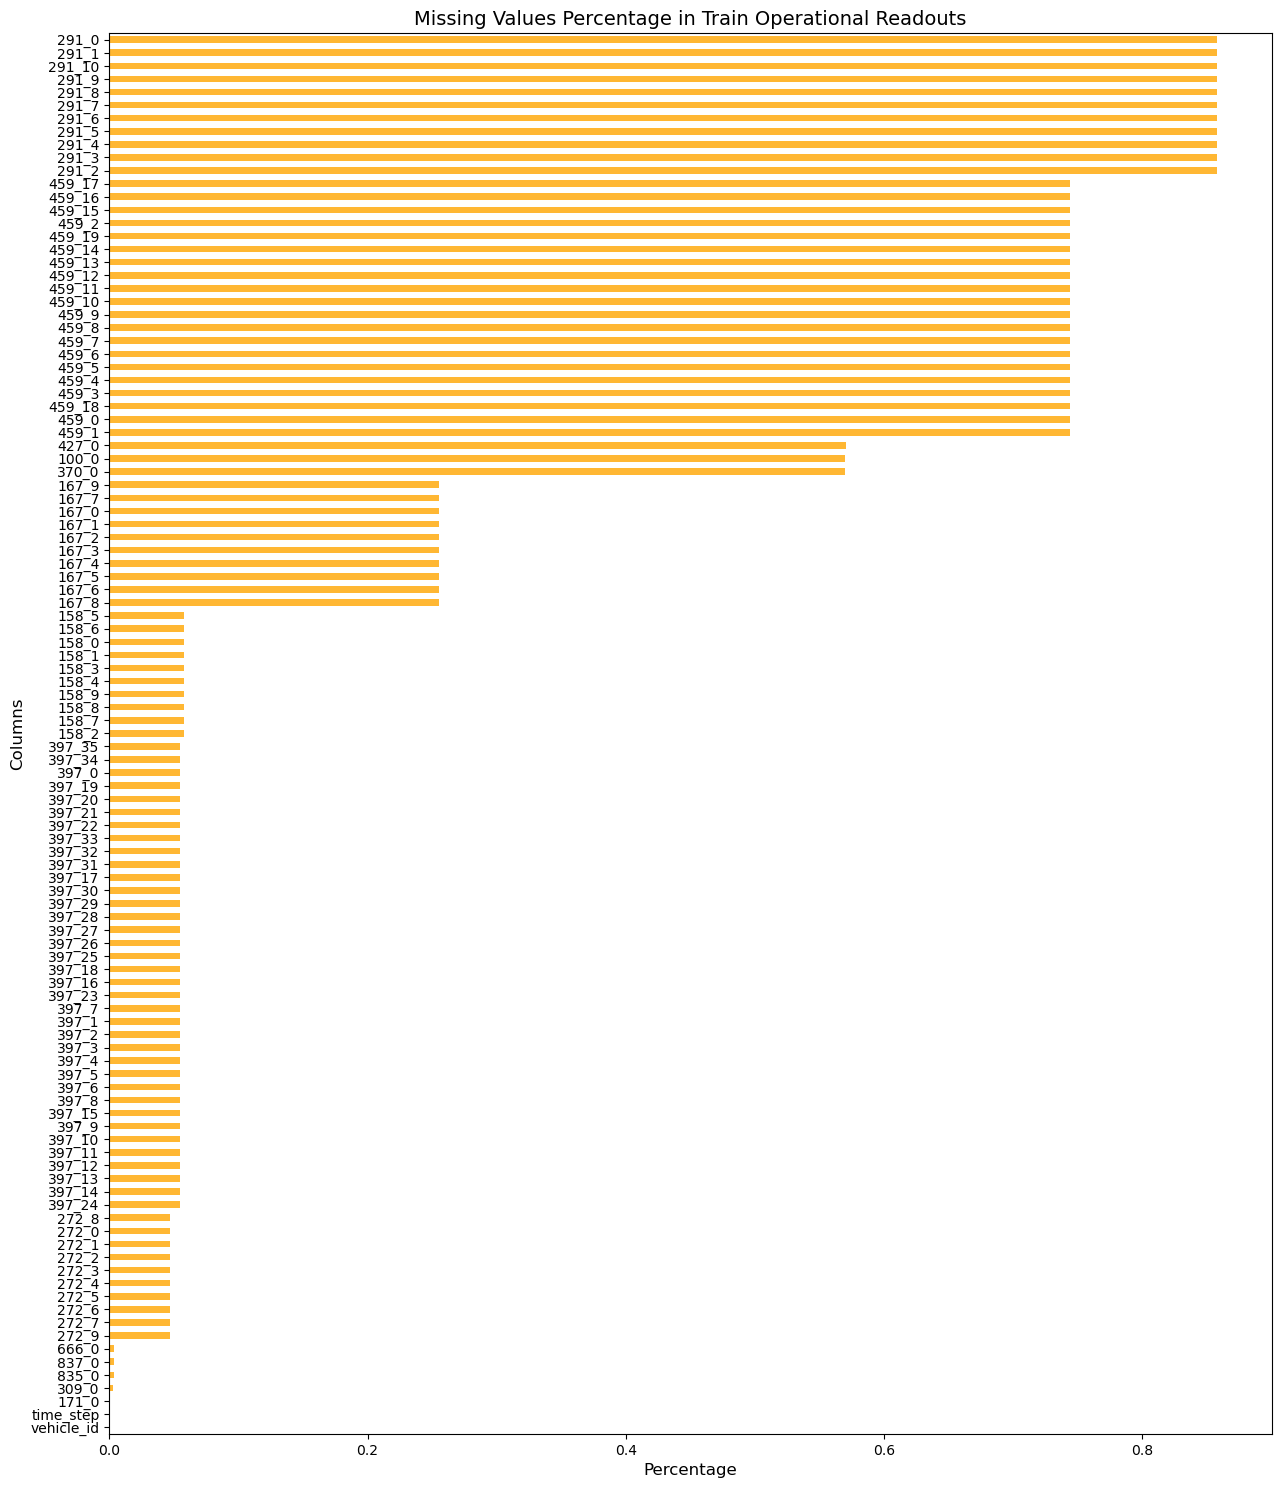

In [37]:
plot_missing_values(df_train_operational_readouts, "Train Operational Readouts")

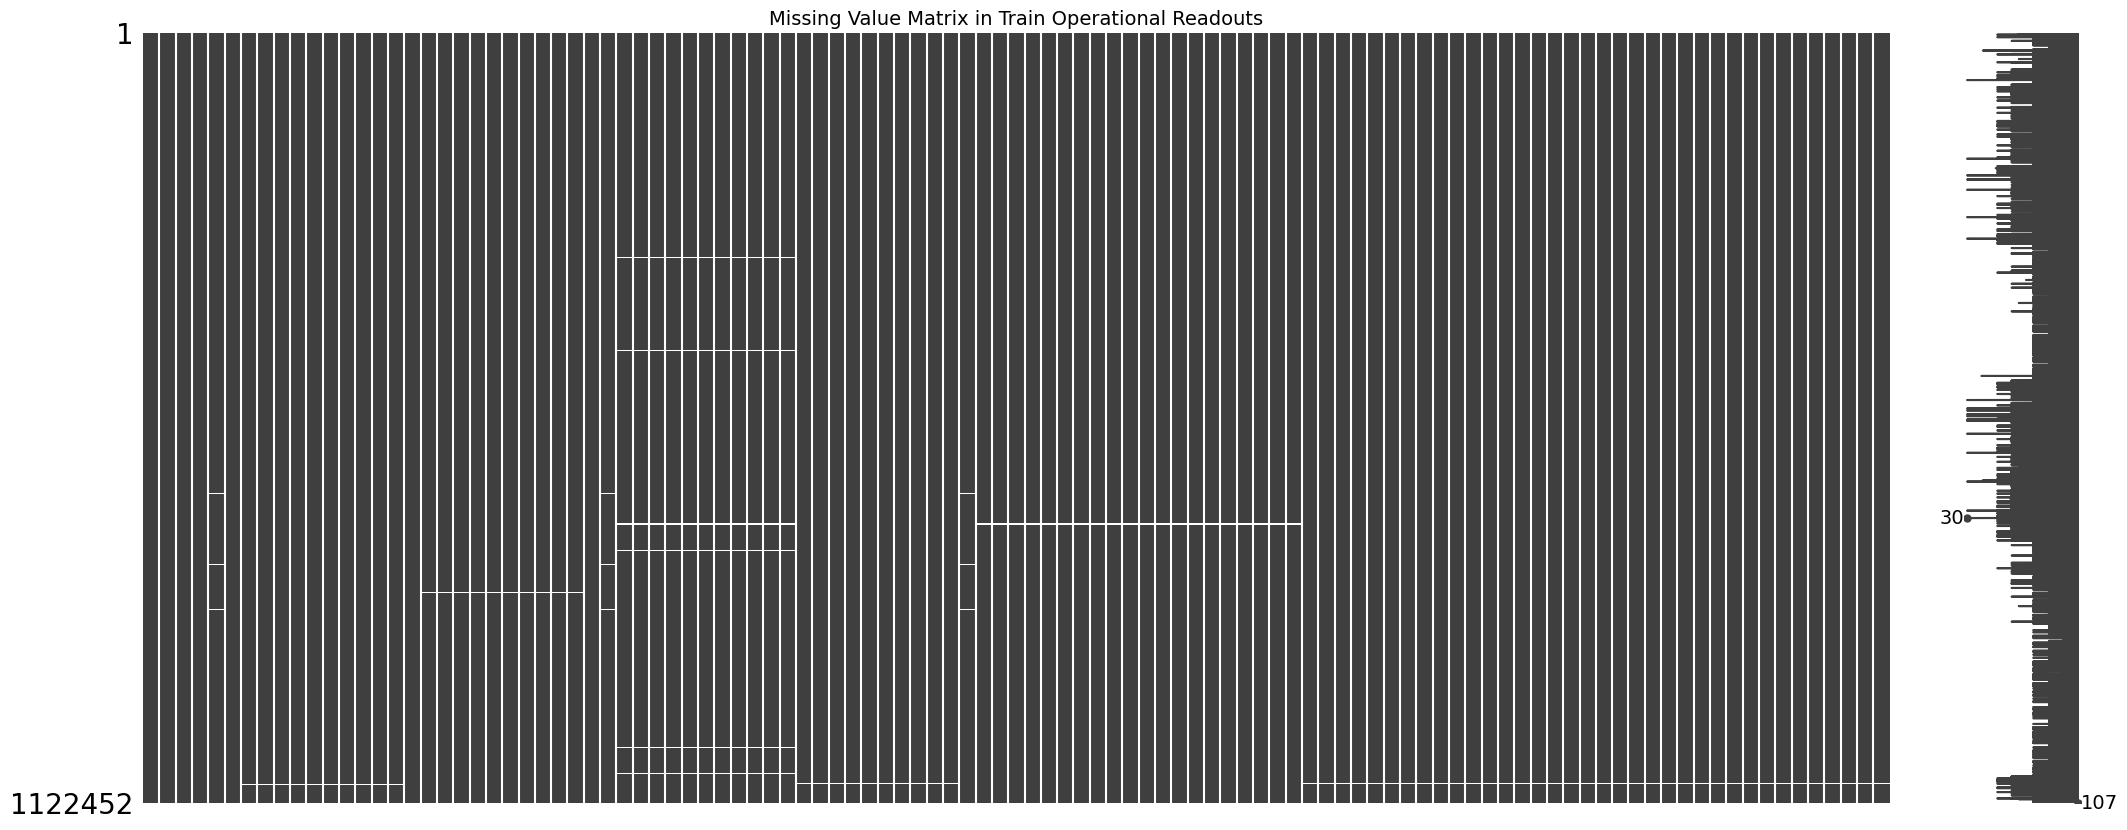

In [47]:
msno.matrix(df_train_operational_readouts)
plt.title(f"Missing Value Matrix in Train Operational Readouts", fontsize=14)
plt.show()

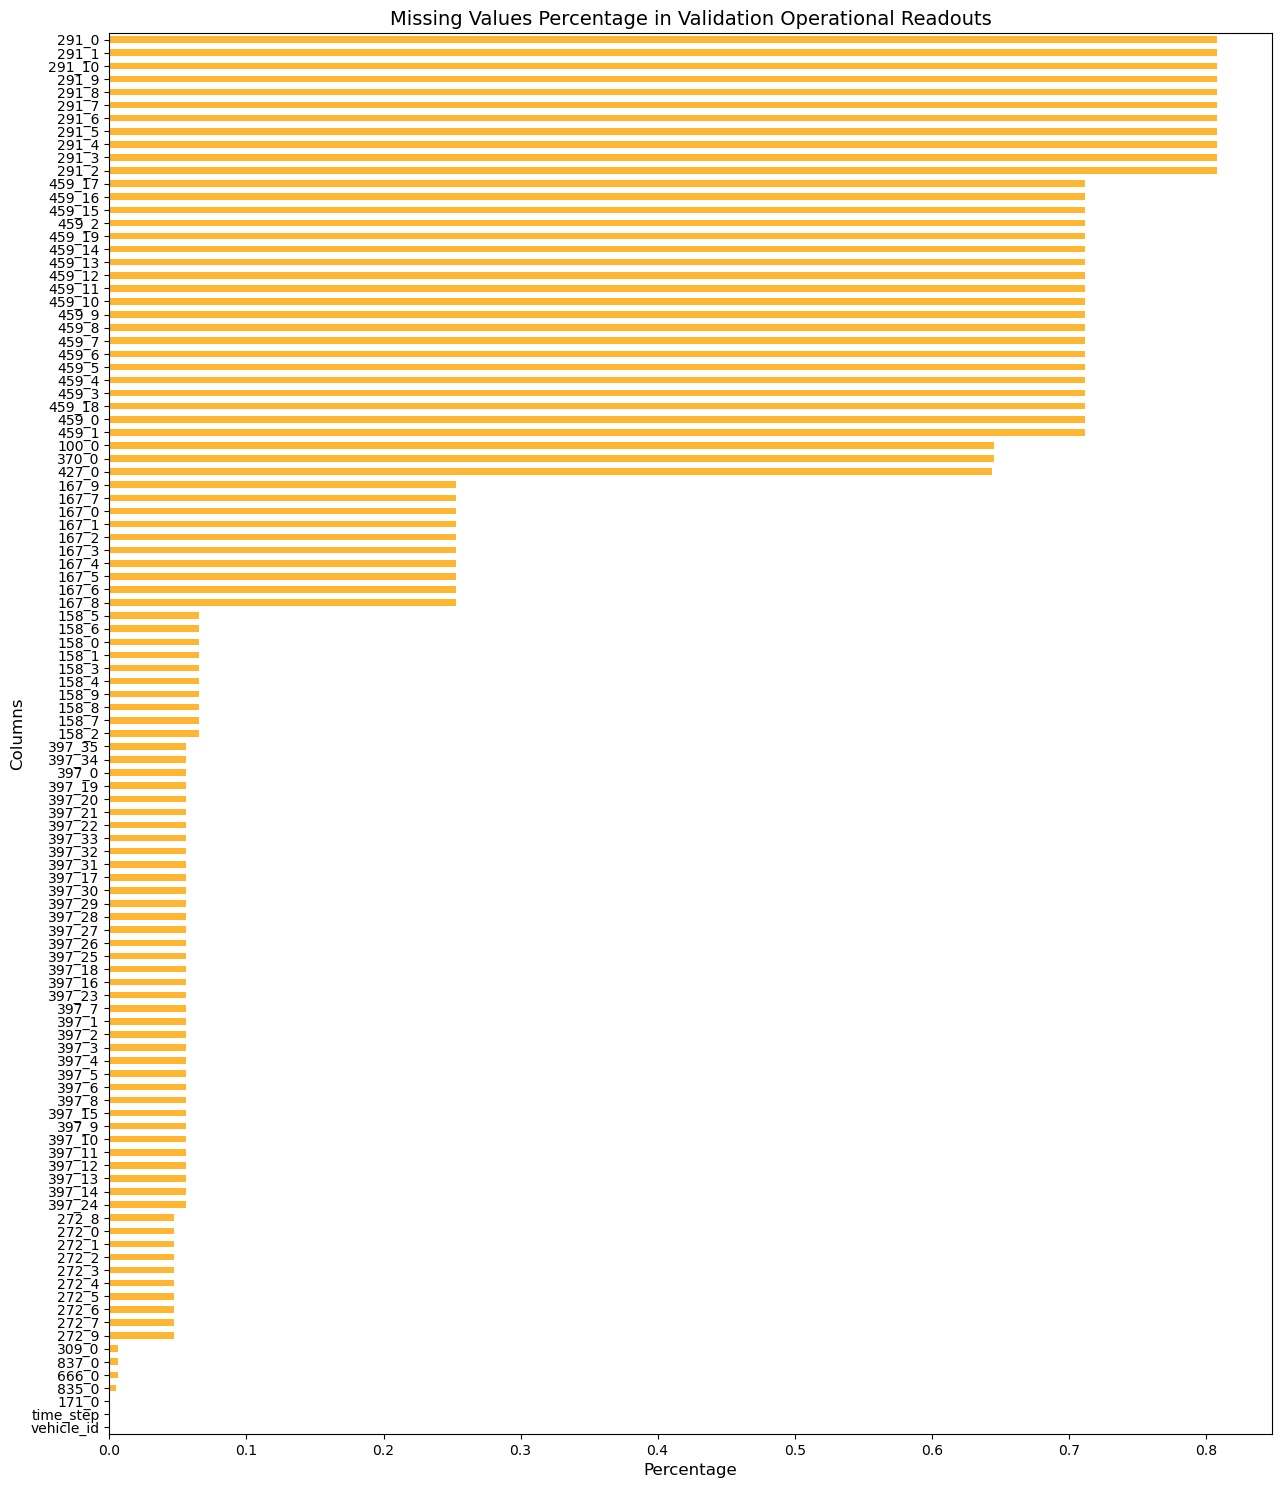

In [41]:
plot_missing_values(df_validation_operational_readouts, "Validation Operational Readouts")

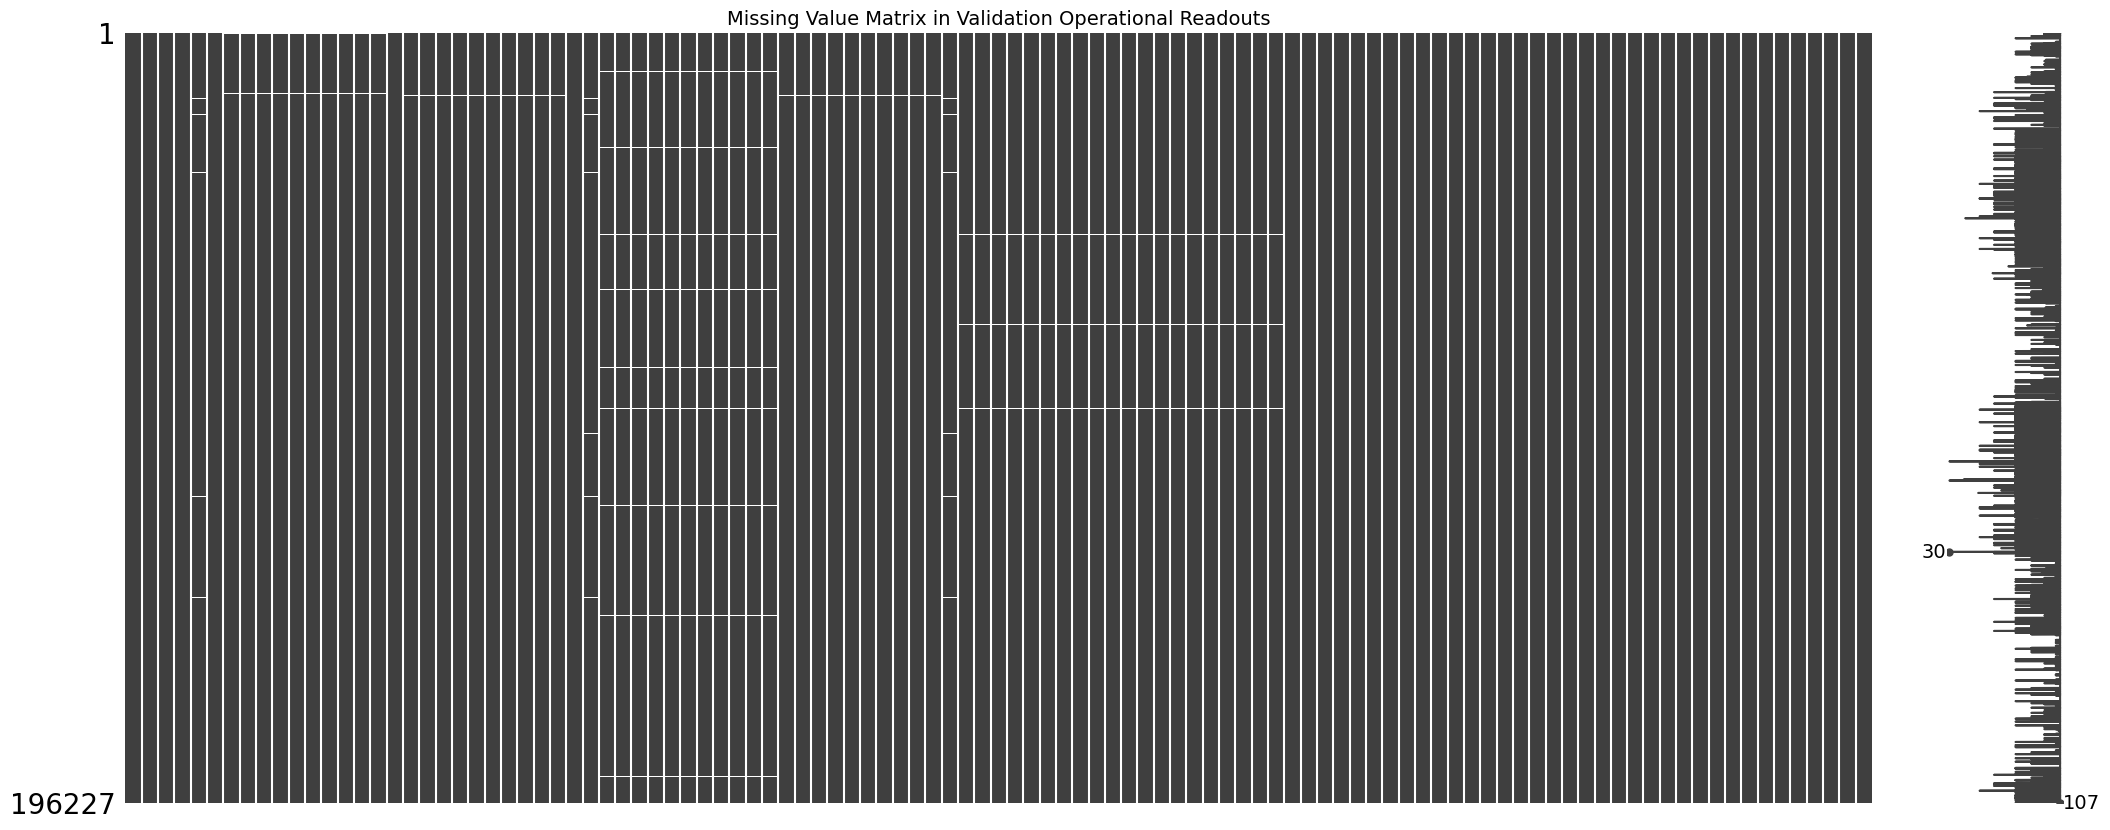

In [39]:
msno.matrix(df_validation_operational_readouts)
plt.title(f"Missing Value Matrix in Validation Operational Readouts", fontsize=14)
plt.show()

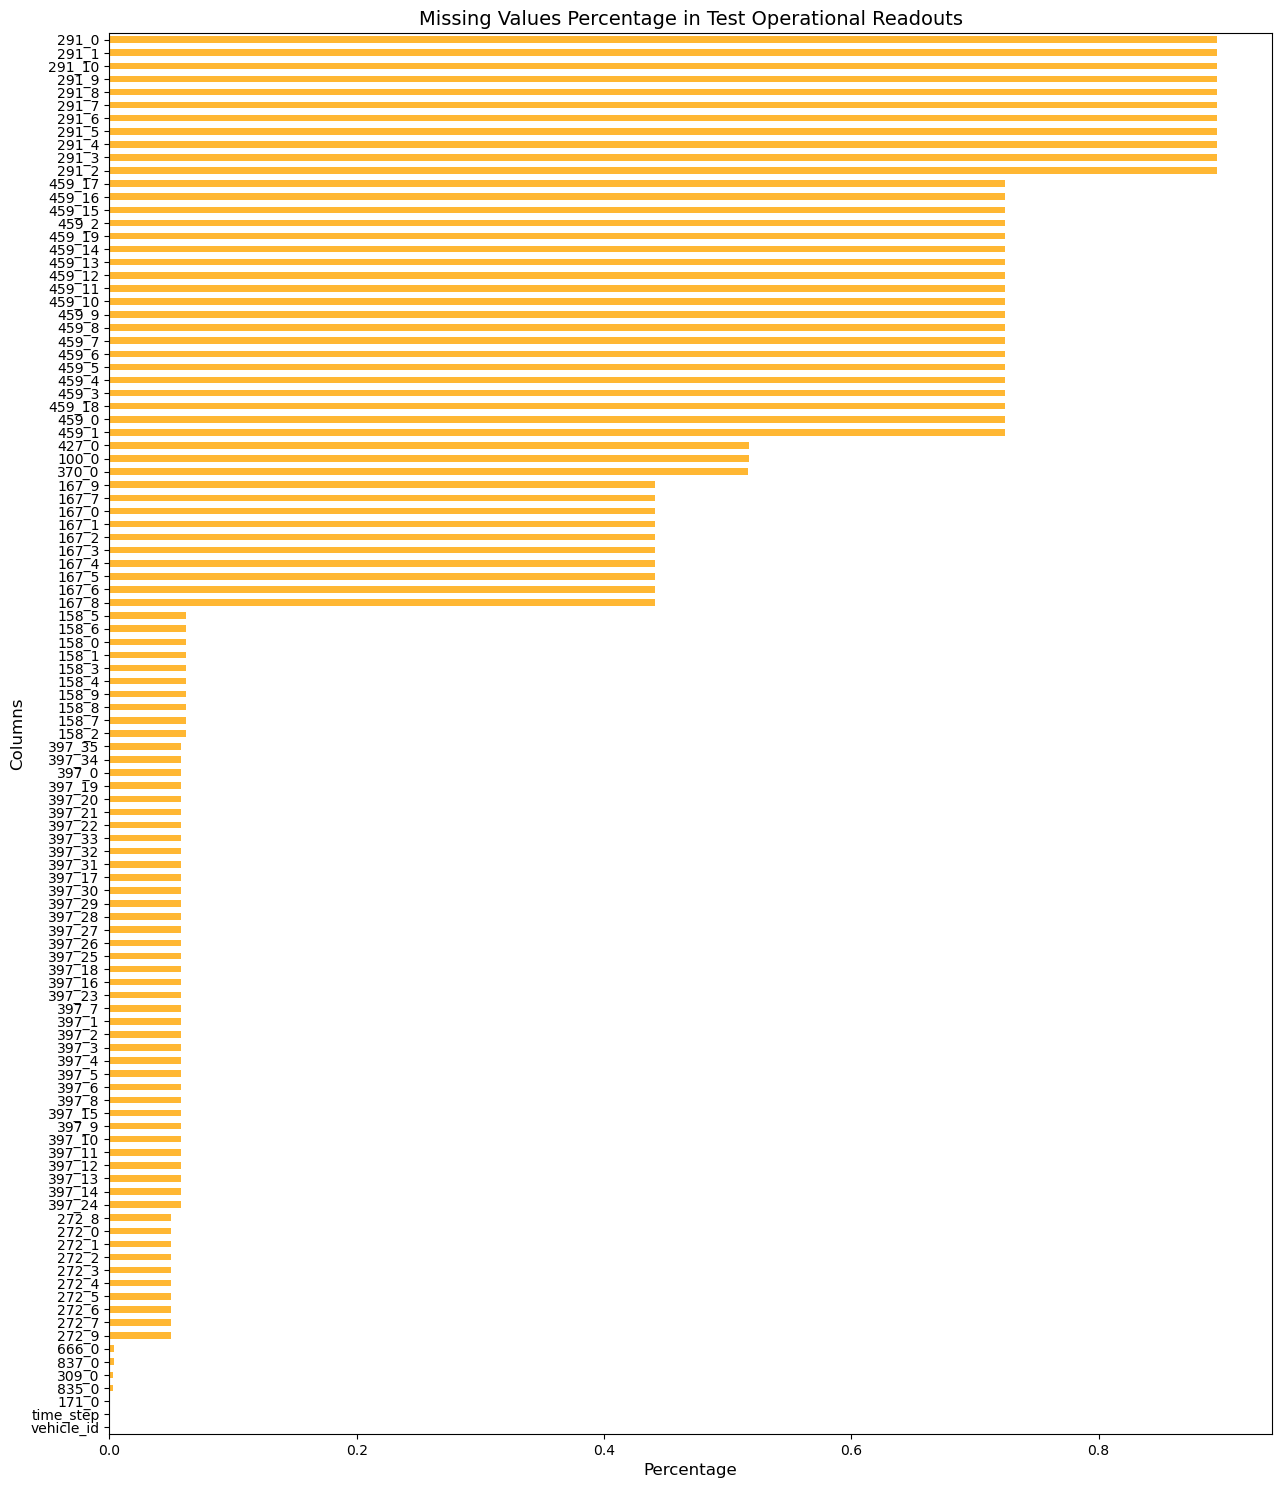

In [43]:
plot_missing_values(df_test_operational_readouts, "Test Operational Readouts")

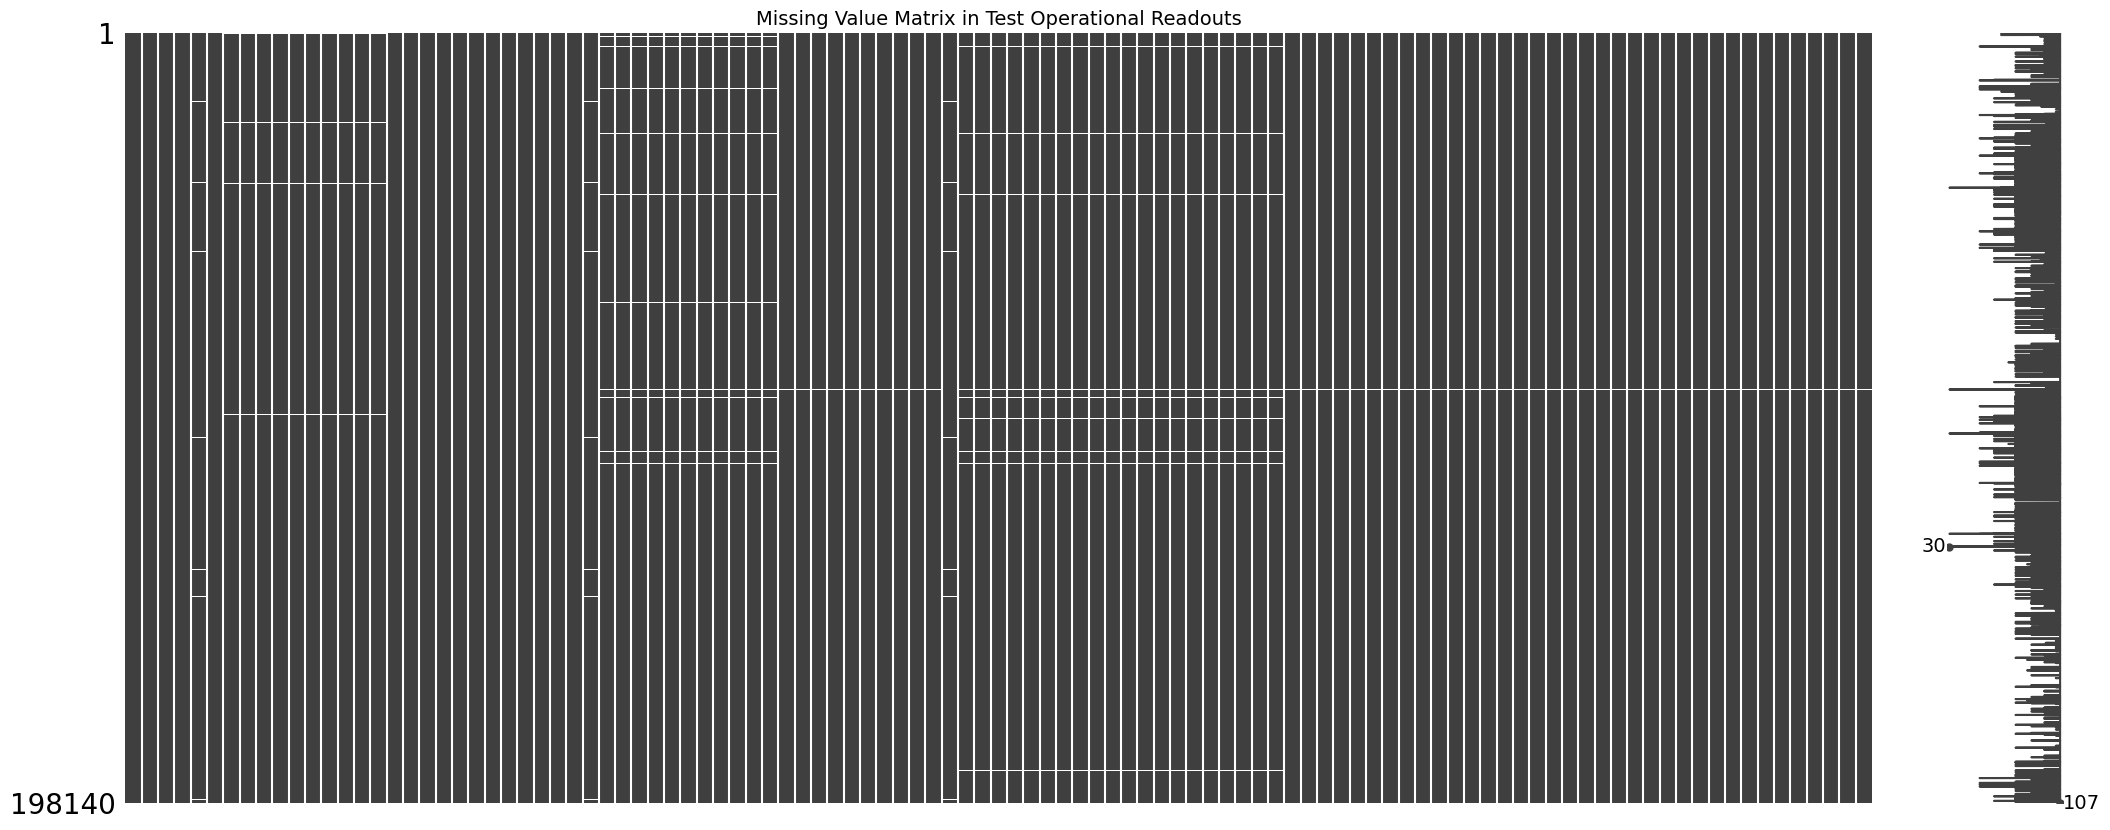

In [44]:
msno.matrix(df_test_operational_readouts)
plt.title(f"Missing Value Matrix in Test Operational Readouts", fontsize=14)
plt.show()

In [10]:
#def plot_distributions(df, name, numerical_only=True):
#    if numerical_only:
#        df = df.select_dtypes(include=np.number)
#    if not df.empty:
#        for column in df.columns:
#            plt.figure(figsize=(14, 6))
#            
#            # Histogram
#            plt.subplot(1, 2, 1)
#            sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue')
#            plt.title(f"{name} - Distribution of {column}")
#            plt.xlabel(column)
#            
#            # Boxplot
#            plt.subplot(1, 2, 2)
#            sns.boxplot(x=df[column], color='cyan')
#            plt.title(f"{name} - Boxplot of {column}")
#            plt.xlabel(column)
#            
#            plt.tight_layout()
#            plt.show()
#
#for df, name in zip(dataframes, names):
#    plot_distributions(df, name)

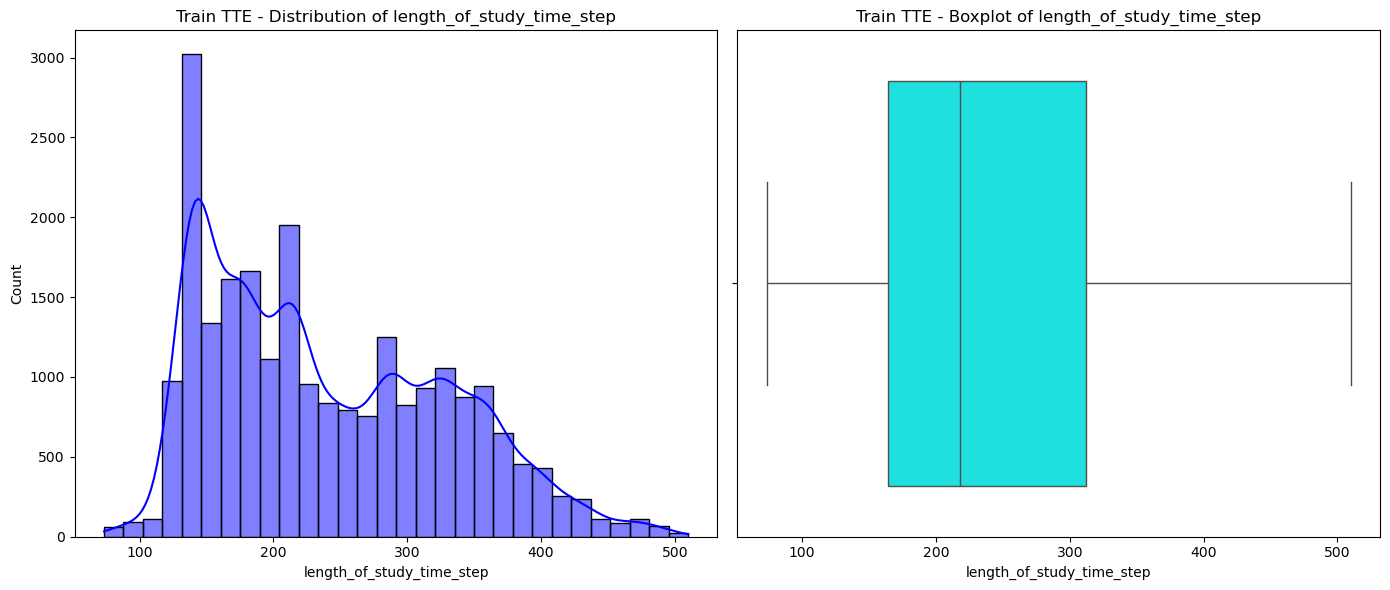

In [11]:
def plot_distribution_and_boxplot(dataframes, names, column_name):
    for df, name in zip(dataframes, names):
        if column_name in df.columns:
            plt.figure(figsize=(14, 6))
            
            # Distribution Plot
            plt.subplot(1, 2, 1)
            sns.histplot(df[column_name].dropna(), kde=True, bins=30, color='blue')
            plt.title(f"{name} - Distribution of {column_name}")
            plt.xlabel(column_name)
            
            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[column_name], color='cyan')
            plt.title(f"{name} - Boxplot of {column_name}")
            plt.xlabel(column_name)
            
            plt.tight_layout()
            plt.show()

plot_distribution_and_boxplot(dataframes, names, 'length_of_study_time_step')

In [12]:
numerical_counters = ["171_0", "666_0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0"]

def visualization_of_vehicle_numerical_counters(dataframe, vehicleId):
    vehicle_data = dataframe[dataframe['vehicle_id'] == vehicleId]
    
    available_counters = [col for col in numerical_counters if col in vehicle_data.columns]
    
    # Plot trends over time for numerical counters
    plt.figure(figsize=(10, 6))
    for col in available_counters:
        plt.plot(vehicle_data['time_step'], vehicle_data[col], marker='o', label=col)
    
    plt.title("Non-Histogram Features of Vehicle #" + str(vehicleId) +  " Over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Feature Values")
    plt.legend()
    plt.grid()
    plt.show()

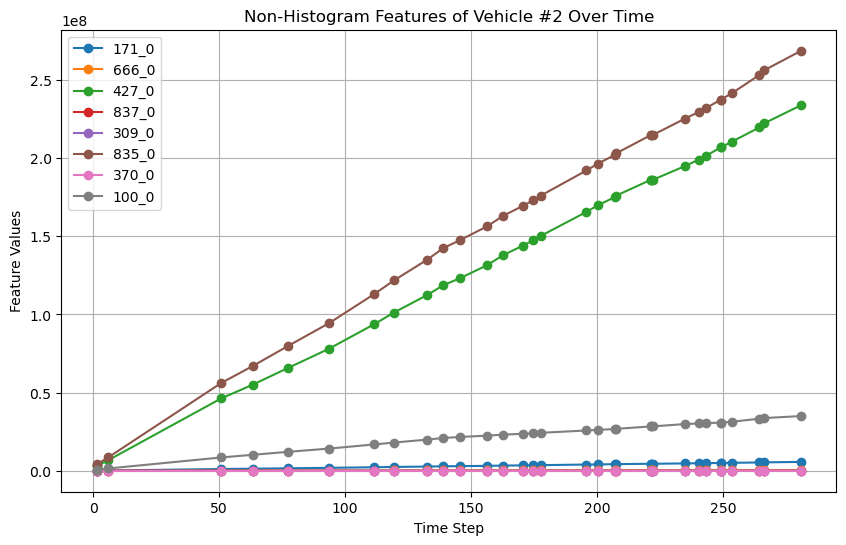

In [13]:
visualization_of_vehicle_numerical_counters(df_train_operational_readouts, 2)

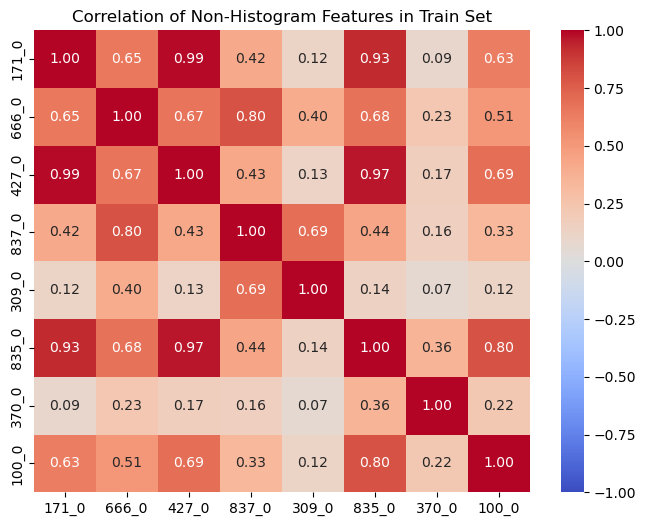

In [14]:
correlation_data = df_train_operational_readouts[numerical_counters].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation of Non-Histogram Features in Train Set")
plt.show()

In [15]:
def visualization_of_vehicle_variable(dataframe, vehicleId, variable_name):
    vehicle_data = dataframe[dataframe['vehicle_id'] == vehicleId]
    
    if not vehicle_data.empty:
        variable_columns = [col for col in vehicle_data.columns if col.startswith(str(variable_name))]
    
        if variable_columns:
            plt.figure(figsize=(10, 6))
            values = vehicle_data[variable_columns].mean()  
            sns.barplot(x=variable_columns, y=values, palette='husl', alpha=0.8)
            plt.title("Histogram of Variable " + str(variable_name) + " of Vehicle #" + str(vehicleId))
            plt.xlabel("Histogram bins for variable " + str(variable_name))
            plt.ylabel("Values")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("No columns starting with '", variable_name, "' found in the dataset for Vehicle", vehicleId)
    else:
        print("No data found for vehicle_id =", vehicleId)

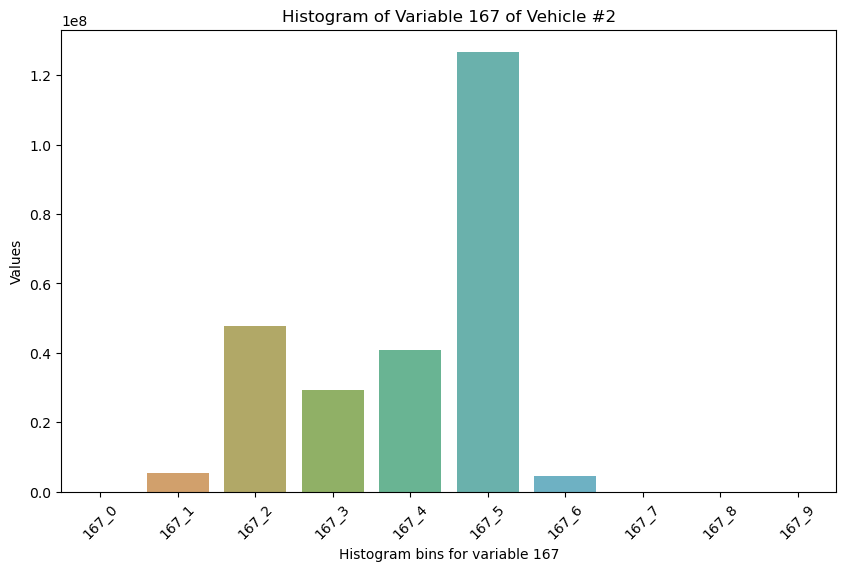

In [16]:
visualization_of_vehicle_variable(df_train_operational_readouts, 2, 167)

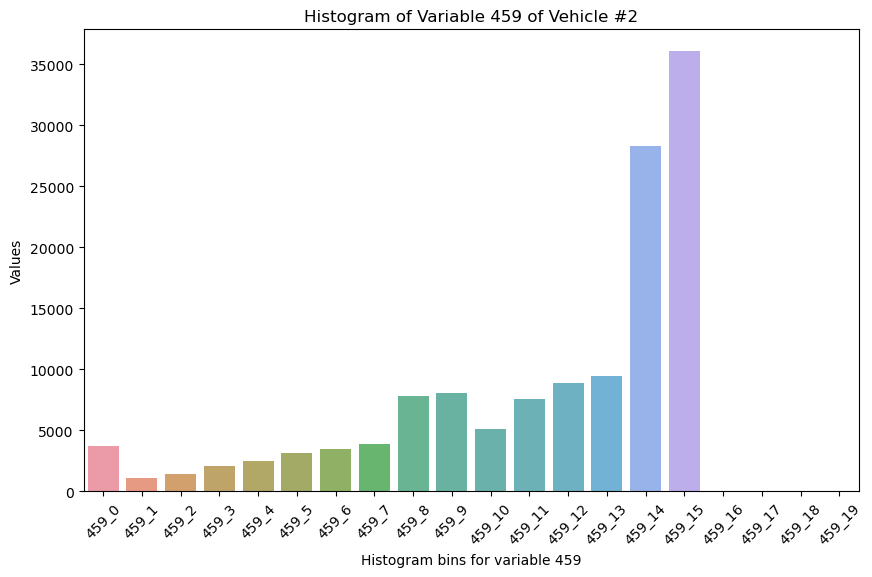

In [17]:
visualization_of_vehicle_variable(df_train_operational_readouts, 2, 459)

In [12]:
def visualization_distribution_pie_chart(dataframe, column):
    column_distribution = dataframe[column].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        column_distribution,
        labels=column_distribution.index,
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct * column_distribution.sum() / 100)})",
        startangle=90,
        colors=['blue', 'red'],
        textprops={'color': 'white'}
    )
    
    plt.title("Distribution of " + column)
    
    distribution_text = "\n".join([f"{label}: {count} ({(count / column_distribution.sum() * 100):.1f}%)"
                                   for label, count in column_distribution.items()])
    plt.figtext(0.5, -0.1, distribution_text, ha="center", fontsize=10, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})
    
    plt.show()

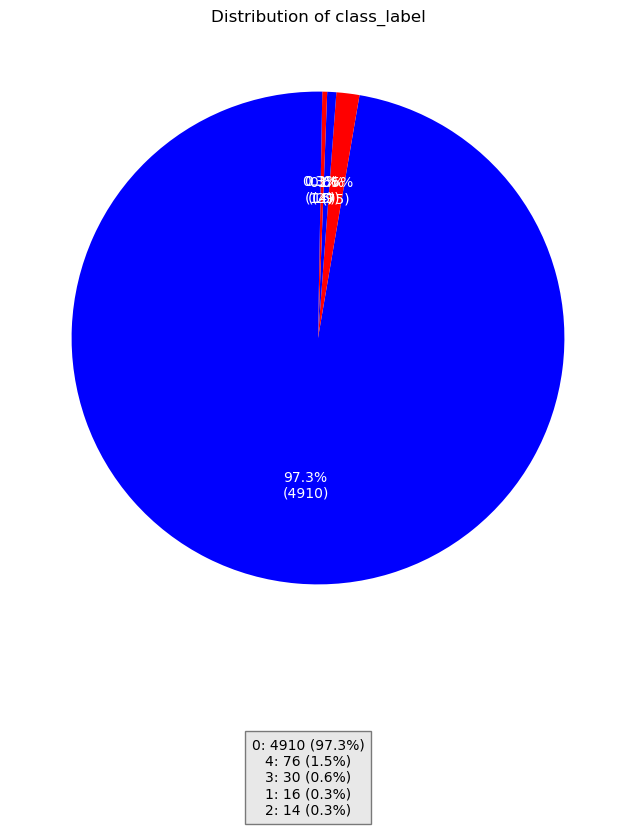

In [20]:
visualization_distribution_pie_chart(df_validation_labels, 'class_label')

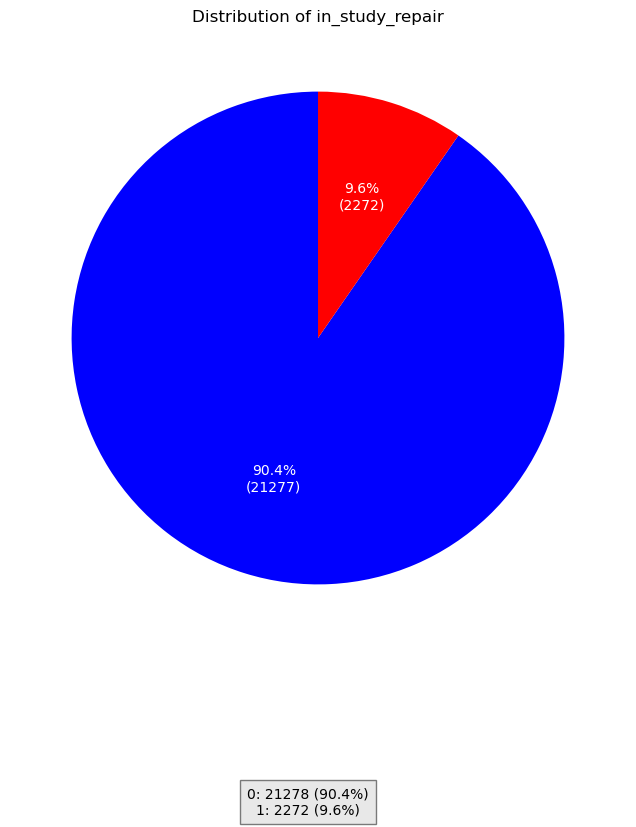

In [19]:
visualization_distribution_pie_chart(df_train_tte, 'in_study_repair')

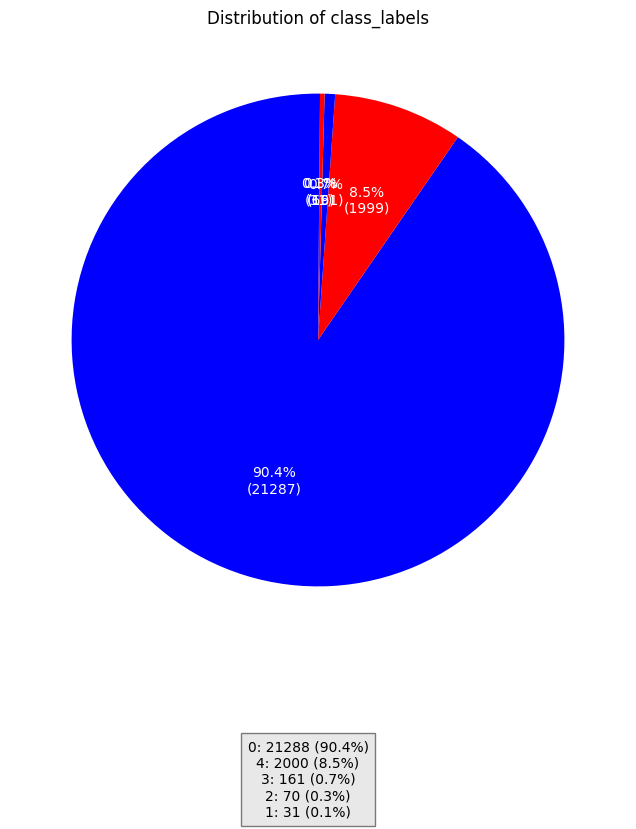

In [15]:
df_train_labels = pd.read_csv('processed_train_labels.csv')
visualization_distribution_pie_chart(df_train_labels, 'class_labels')

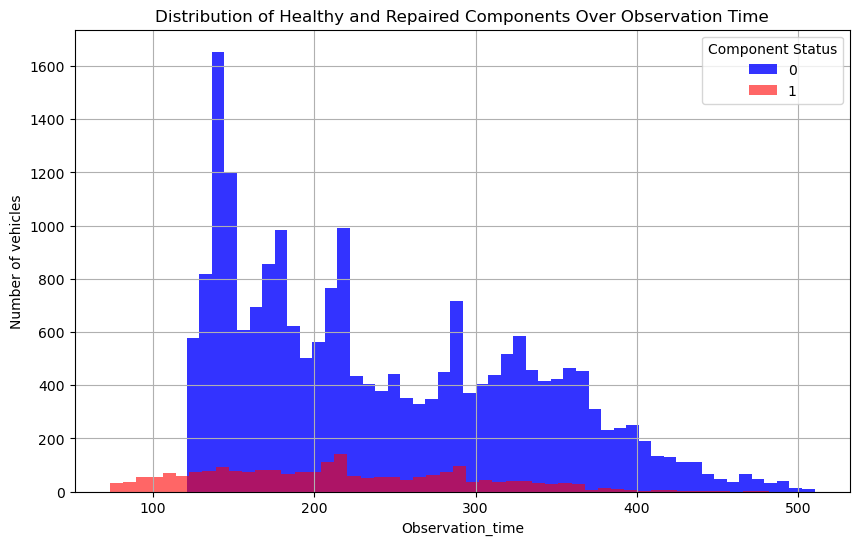

In [21]:
repaired = df_train_tte[df_train_tte['in_study_repair'] == 1]['length_of_study_time_step']
healthy = df_train_tte[df_train_tte['in_study_repair'] == 0]['length_of_study_time_step']

plt.figure(figsize=(10, 6))
plt.hist(healthy, bins=50, alpha=0.8, label='0', color='blue')
plt.hist(repaired, bins=50, alpha=0.6, label='1', color='red')

plt.xlabel("Observation_time")
plt.ylabel("Number of vehicles")
plt.legend(title='Component Status')
plt.title("Distribution of Healthy and Repaired Components Over Observation Time")
plt.grid(True)
plt.show()

In [25]:
def visualization_of_df_specifications(dataframe):
    plt.figure(figsize=(30, 10))
    for idx, column in enumerate(dataframe.columns[1:9], 1):
        plt.subplot(2, 4, idx)  # Create a 2x4 grid of subplots
        dataframe[column].hist(bins=30, alpha=0.75, color='blue', edgecolor='black', xrot=90)
        plt.title(column)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

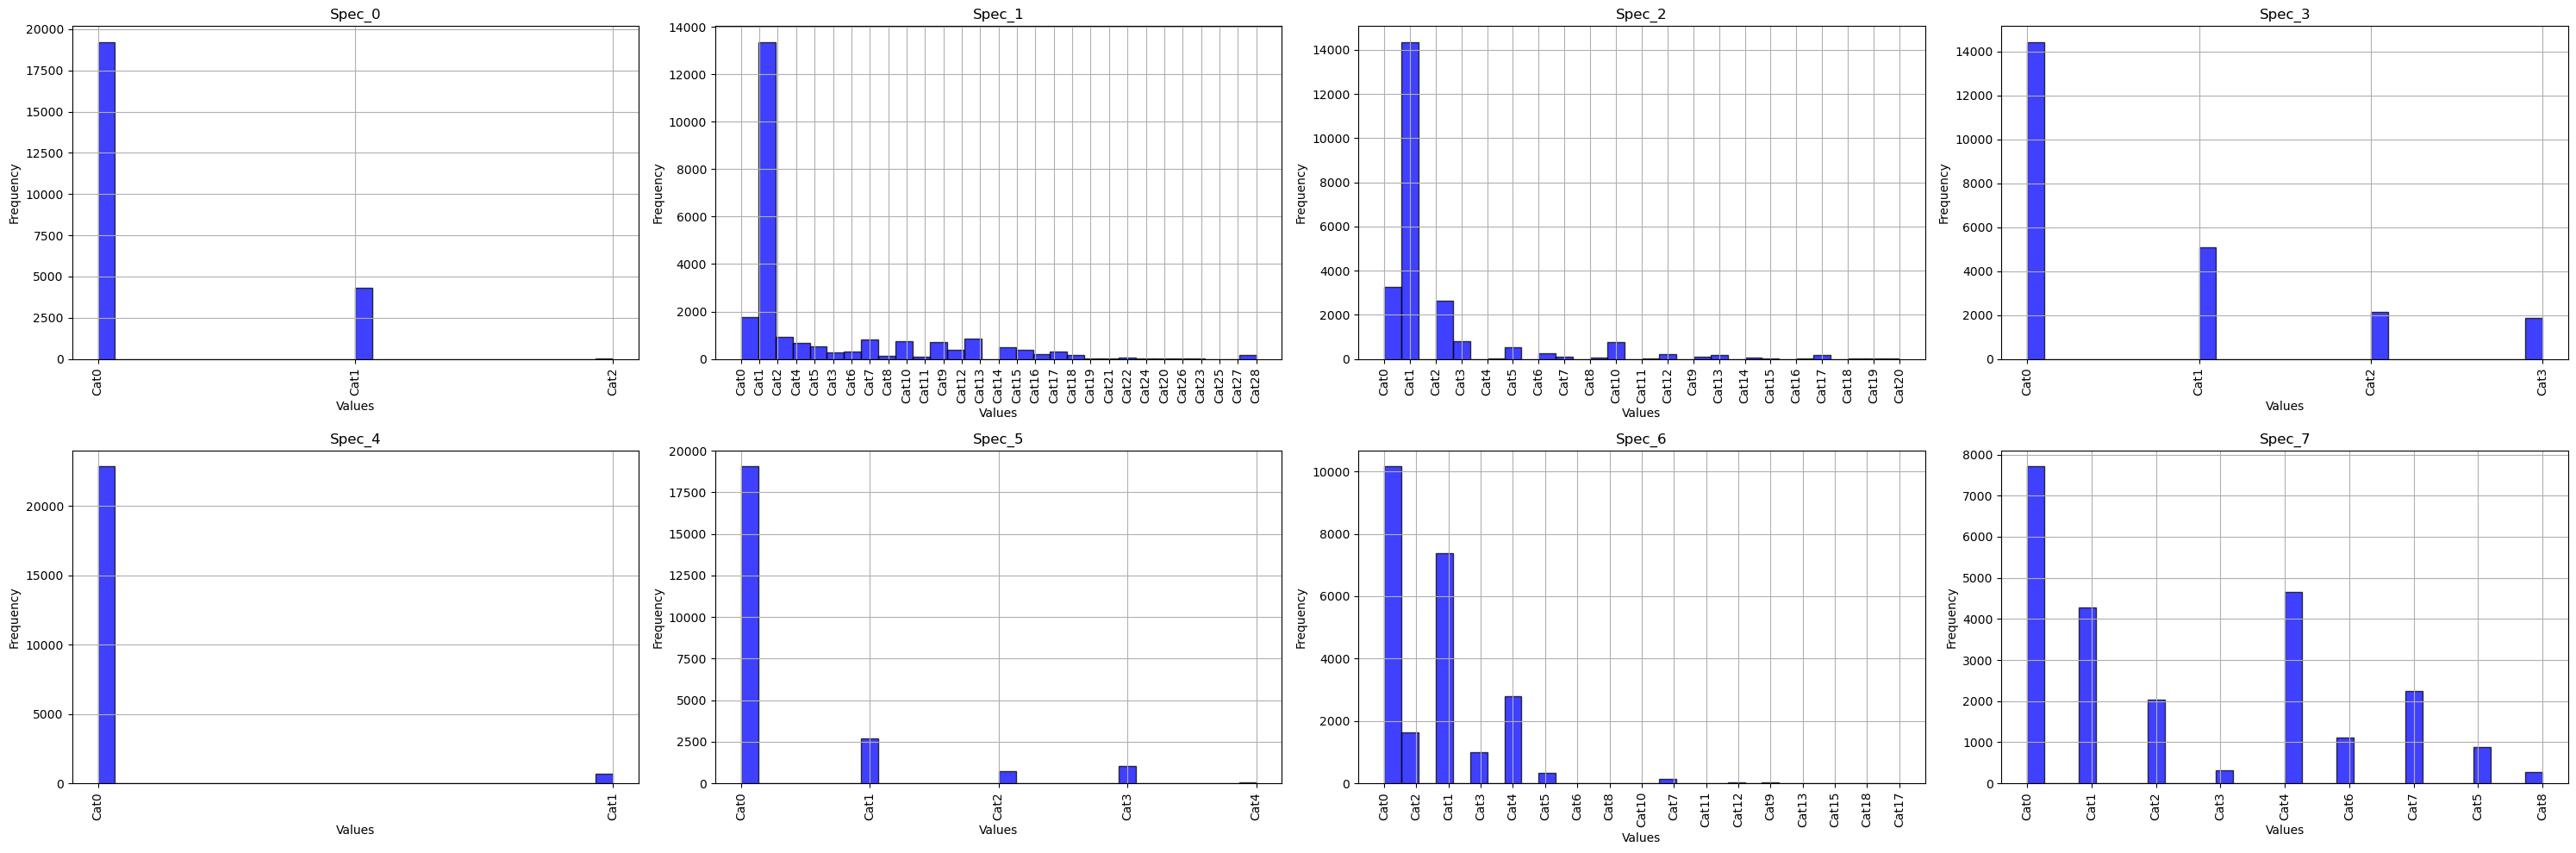

In [27]:
visualization_of_df_specifications(df_train_specifications)

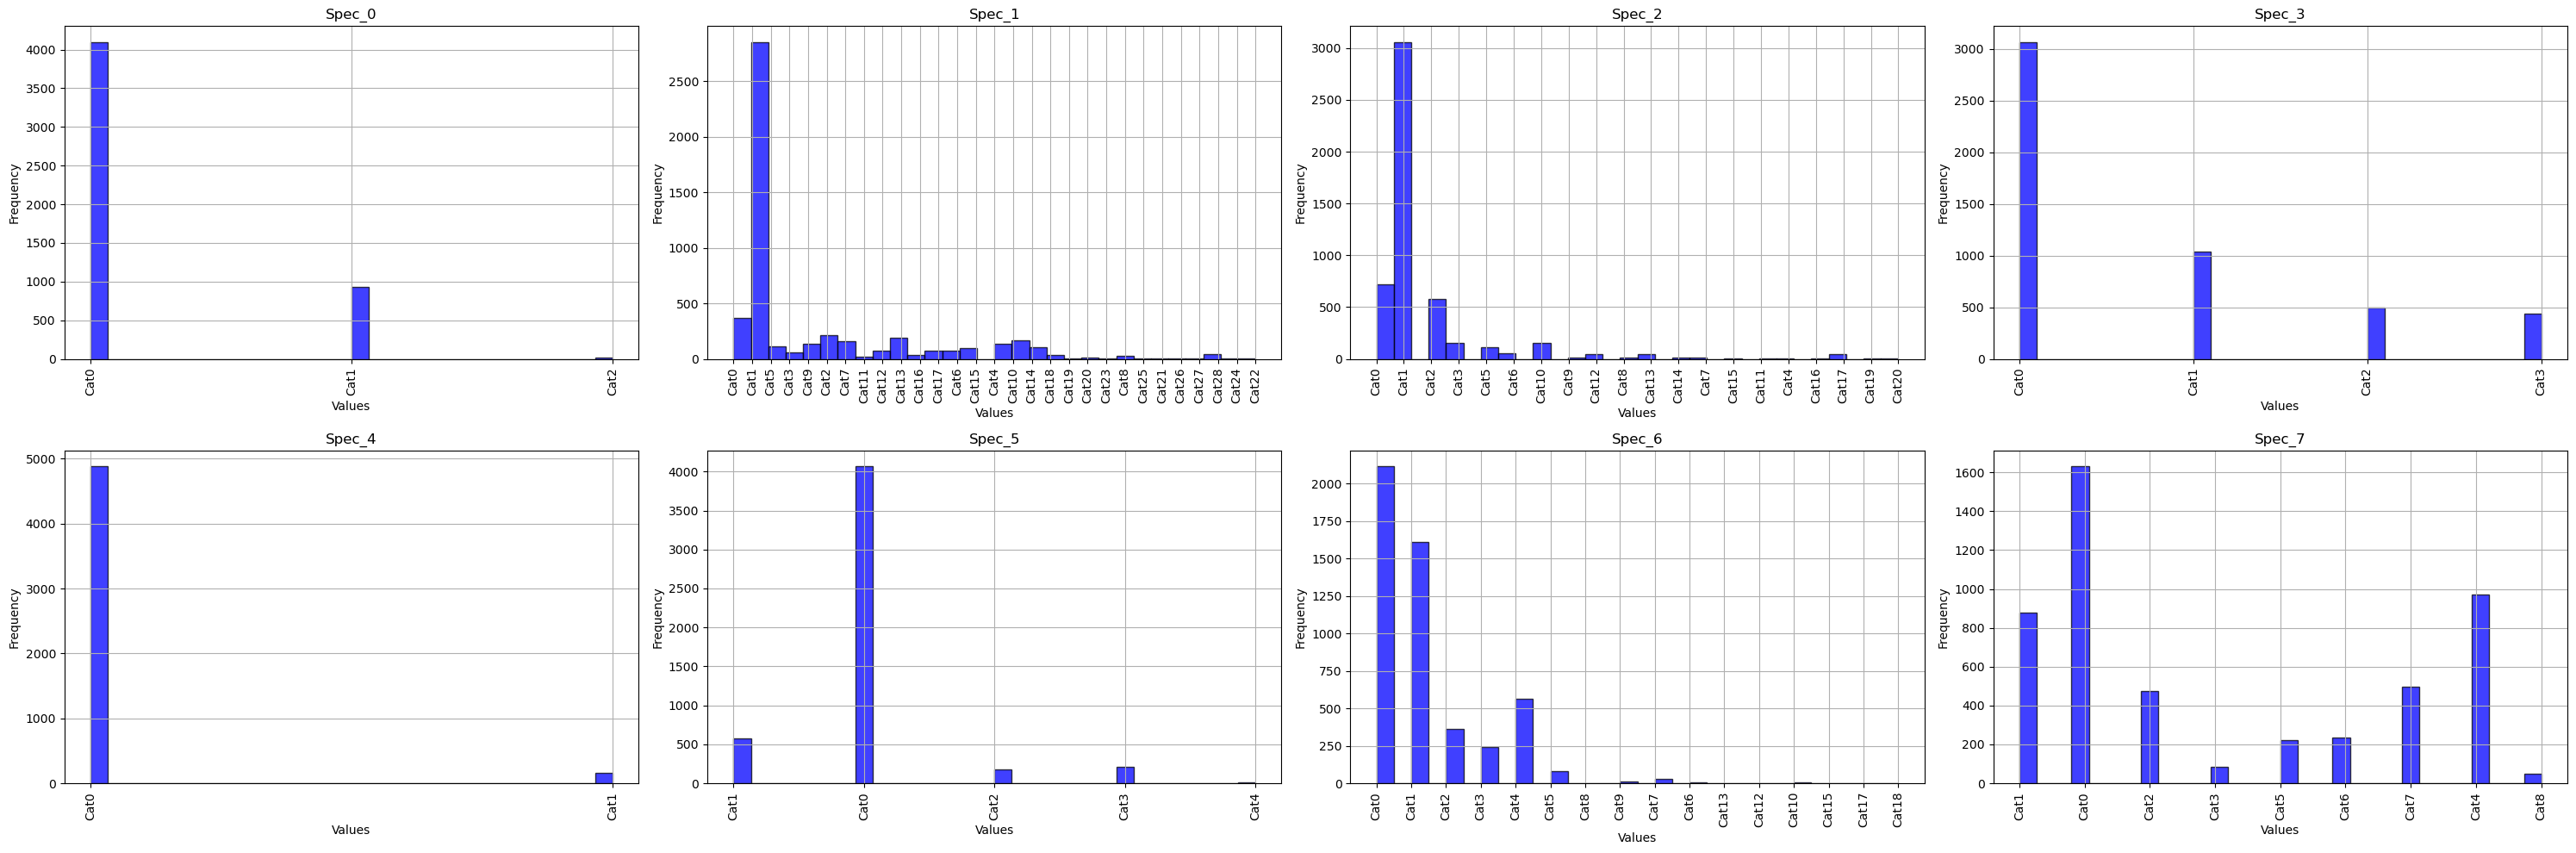

In [29]:
visualization_of_df_specifications(df_validation_specifications)

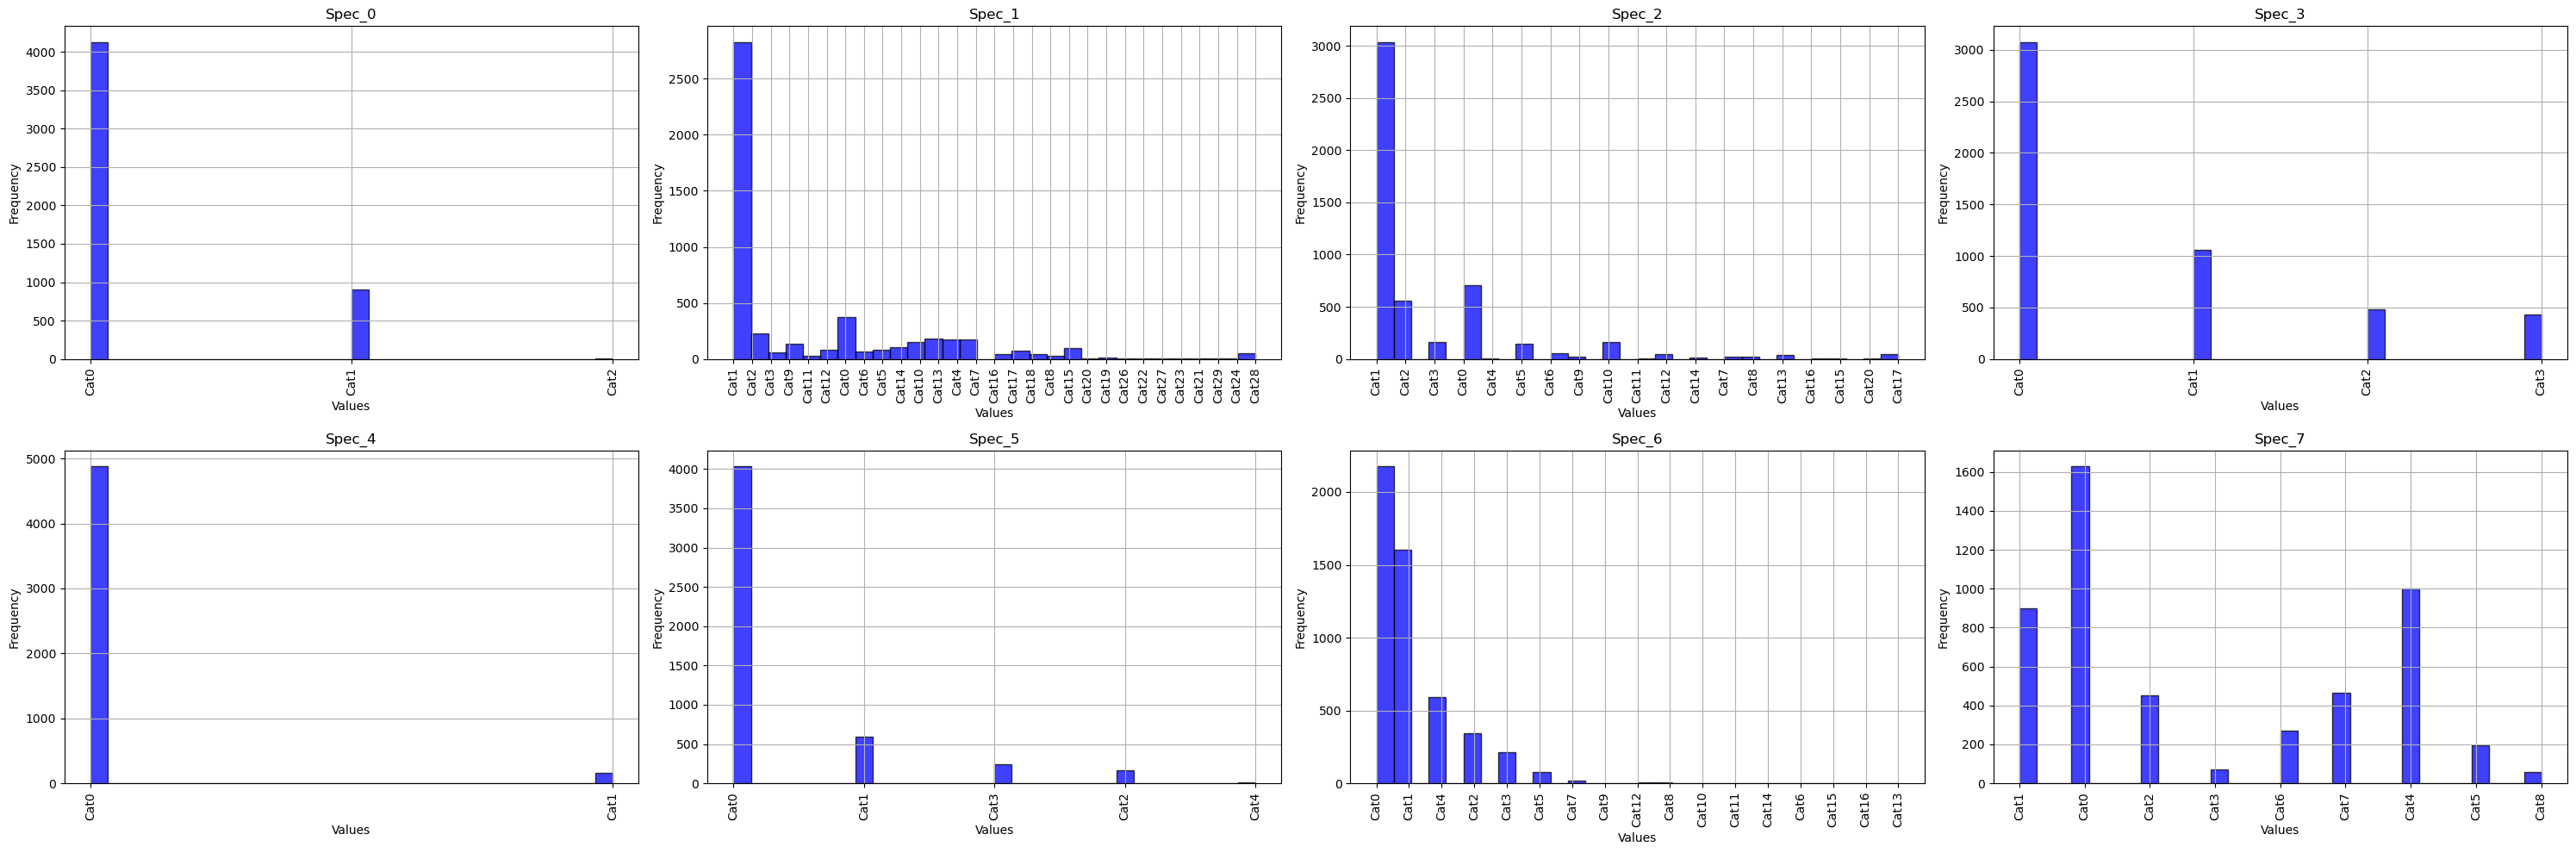

In [31]:
visualization_of_df_specifications(df_test_specifications)

In [8]:
def plot_spec_distribution(column_name):
    """
    Plots the distribution of a specified column (e.g., Spec_0) in the dataset
    grouped by the 'in_study_repair' status.

    Parameters:
        column_name (str): The name of the column to visualize.
    """
    merged_data = pd.merge(df_train_tte, df_train_specifications, on='vehicle_id')
    
    normal_vehicles = merged_data[merged_data['in_study_repair'] == 0]
    repaired_vehicles = merged_data[merged_data['in_study_repair'] == 1]

    normal_dist = normal_vehicles[column_name].value_counts().sort_index()
    repaired_dist = repaired_vehicles[column_name].value_counts().sort_index()

    normal_percent = normal_dist / normal_dist.sum() * 100
    repaired_percent = repaired_dist / repaired_dist.sum() * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].bar(normal_dist.index, normal_dist, color='gray', alpha=0.7)
    for i, val in enumerate(normal_dist):
        axes[0].text(i, val + 50, f"{val}\n{normal_percent.iloc[i]:.1f}%", ha='center', fontsize=10)
    axes[0].set_title(f"Normal vehicles distribution of {column_name}")
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel("No. of vehicles")
    axes[0].tick_params(axis='x', rotation=90)

    axes[1].bar(repaired_dist.index, repaired_dist, color='gray', alpha=0.7)
    for i, val in enumerate(repaired_dist):
        axes[1].text(i, val + 5, f"{val}\n{repaired_percent.iloc[i]:.1f}%", ha='center', fontsize=10)
    axes[1].set_title(f"Repaired vehicles distribution of {column_name}")
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel("No. of vehicles")
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

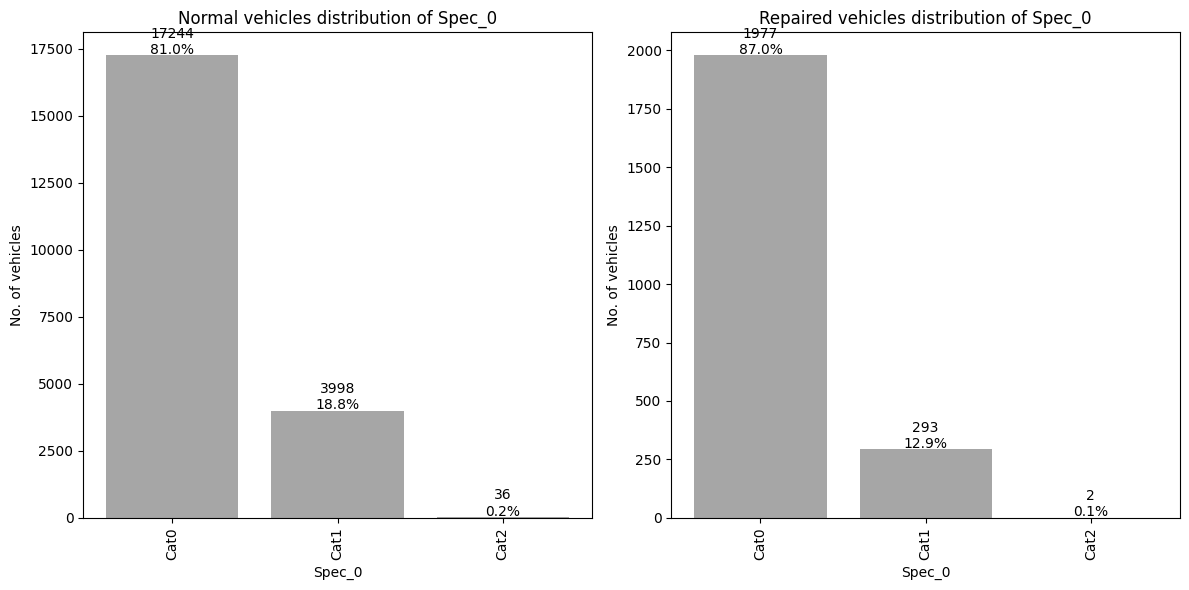

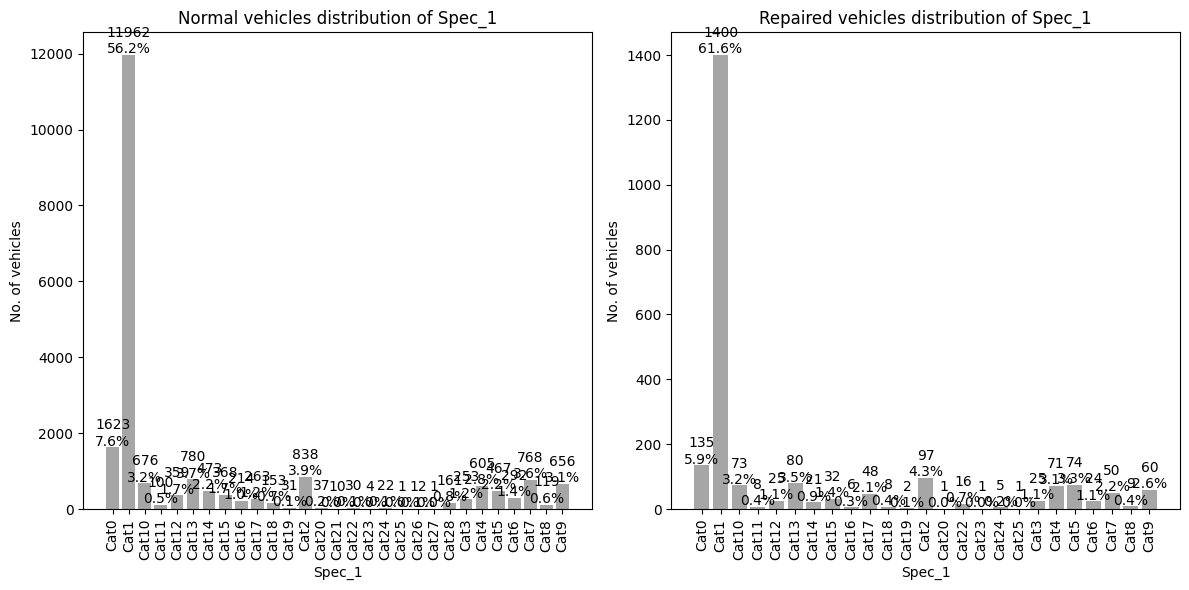

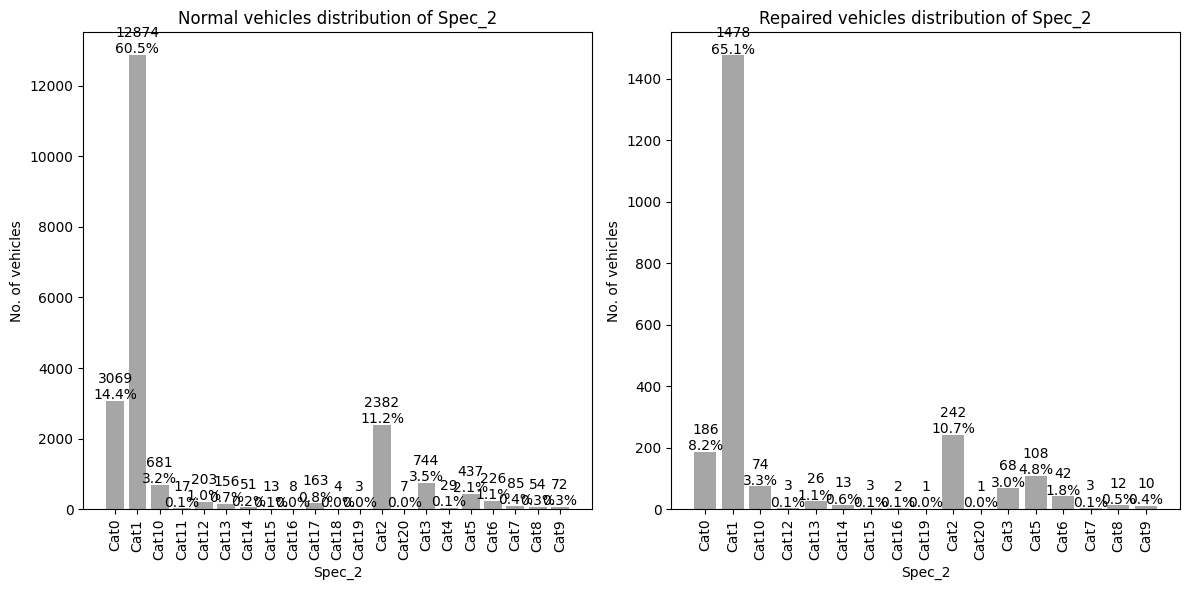

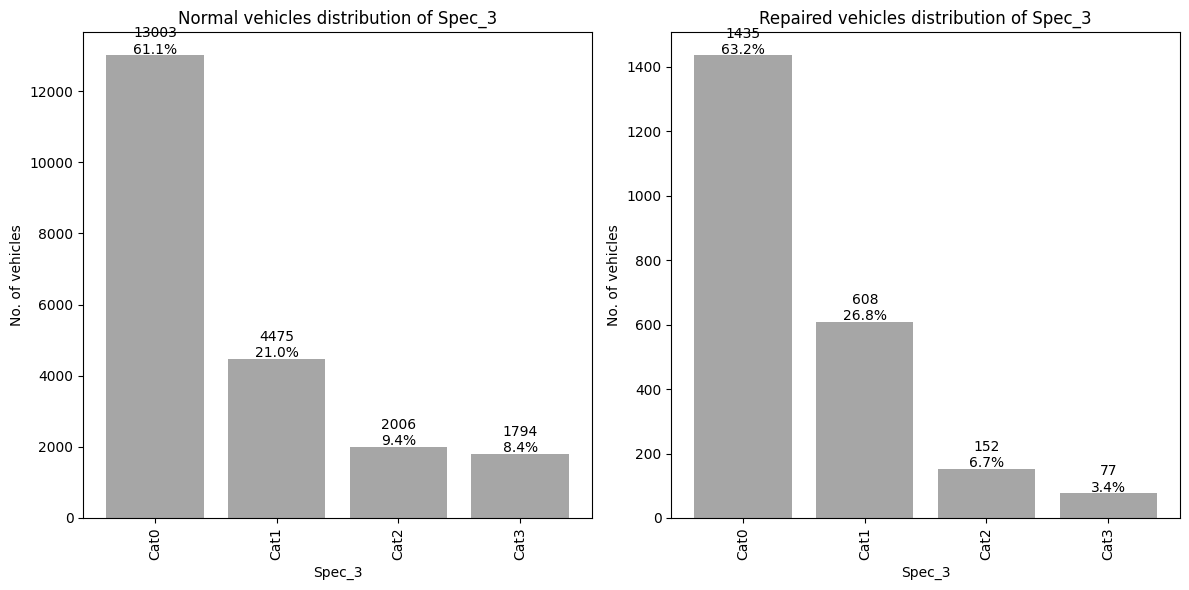

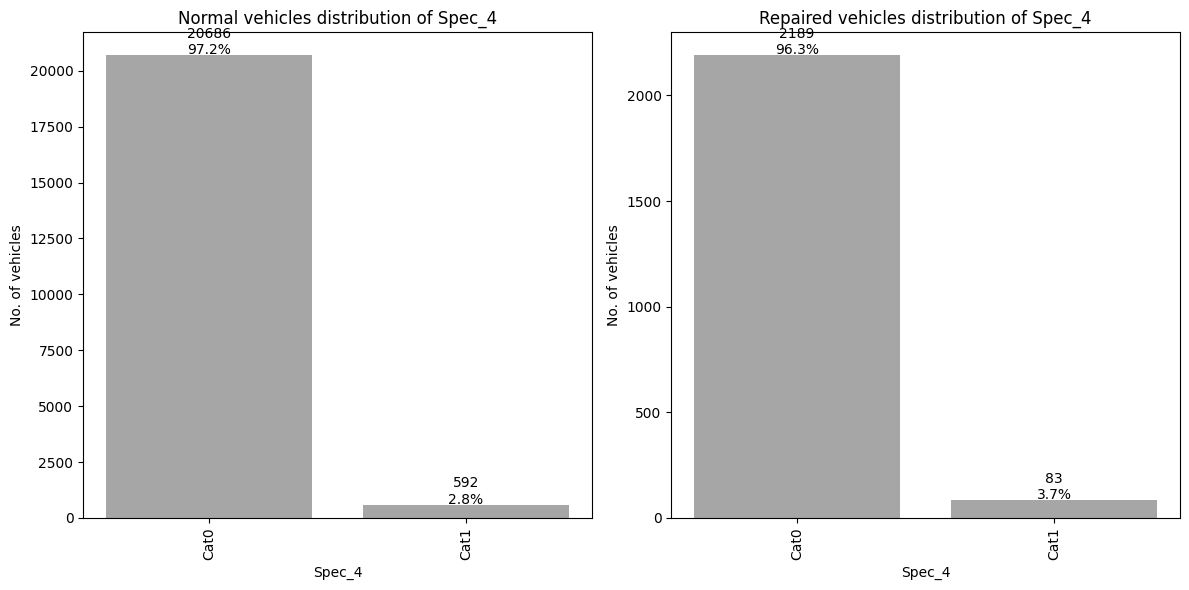

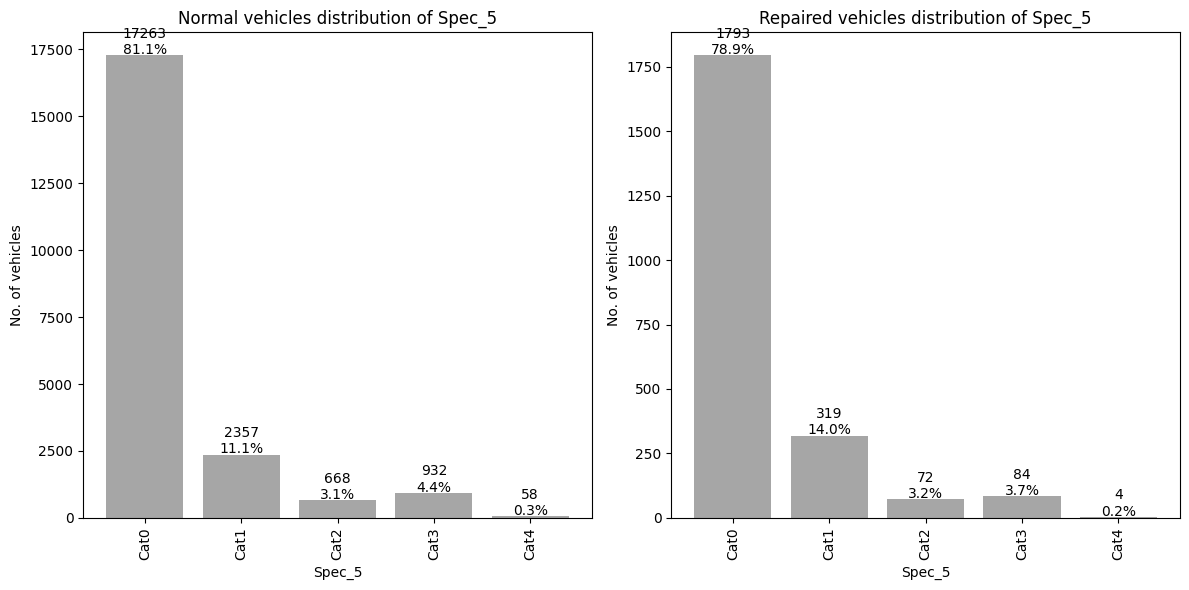

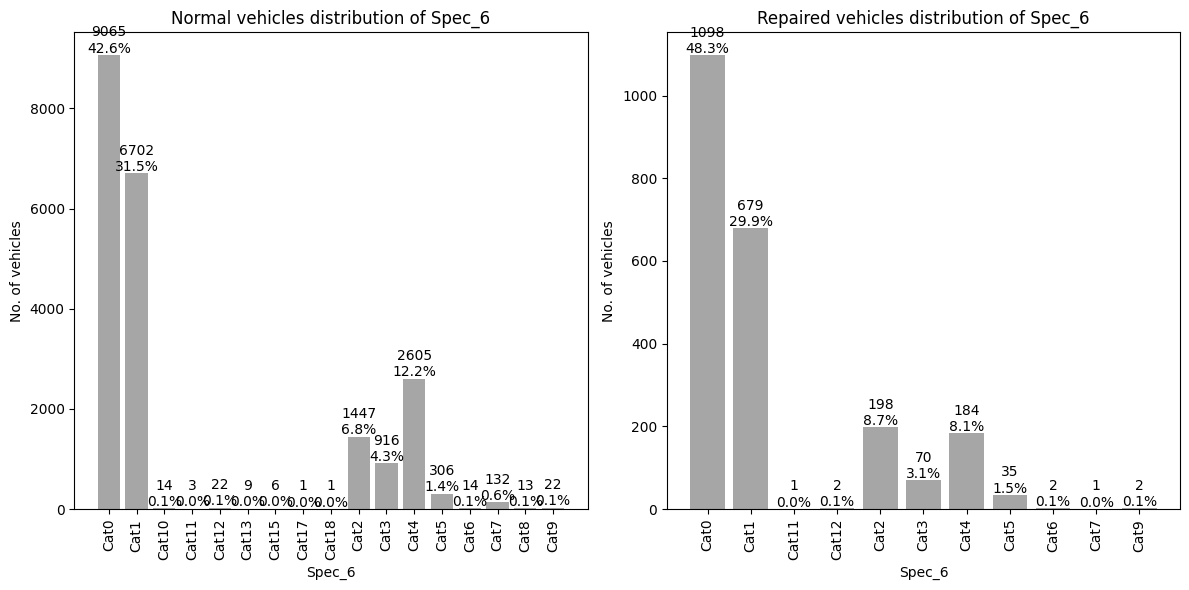

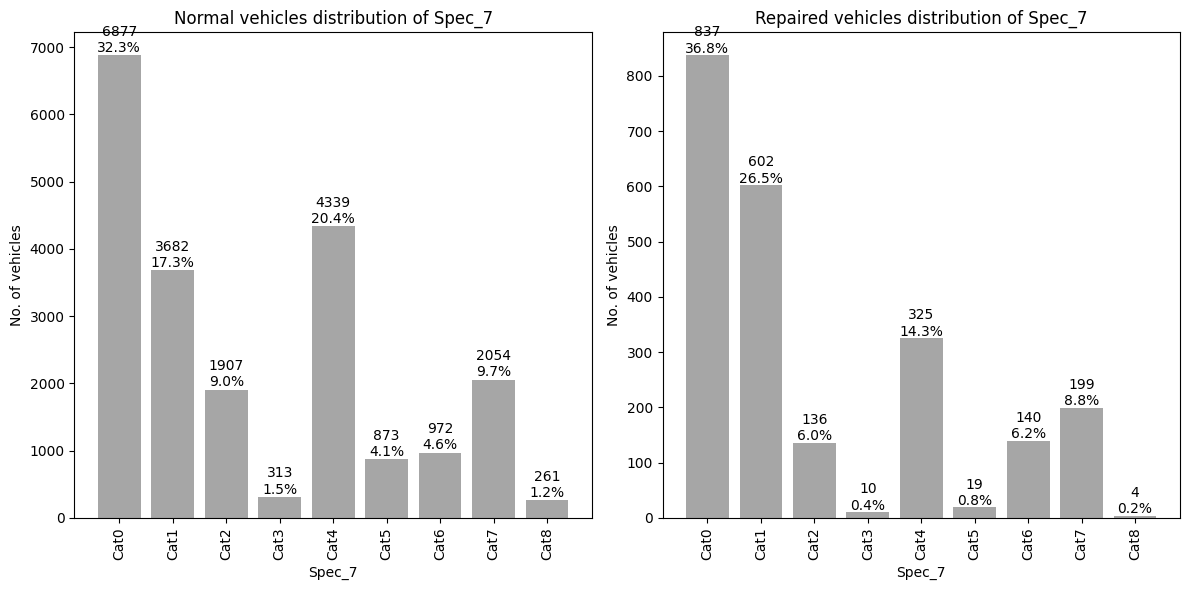

In [9]:
for col in df_train_specifications:
    if col.startswith('Spec'):
        plot_spec_distribution(col)